## Inicializacion


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency, ttest_ind, normaltest

In [84]:
data = pd.read_csv('/content/alzheimers_disease_data.csv')
data.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

## Exploracion inicial
----

In [45]:
data.shape

(2149, 35)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Eliminacion variables irrelevantes

In [85]:
data = data.drop(columns=['PatientID', 'DoctorInCharge'])

# Estadística

#### Estadisticas descriptivas

In [48]:
data.describe().T

count        mean         std         min  \
Age                        2149.0   74.908795    8.990221   60.000000   
Gender                     2149.0    0.506282    0.500077    0.000000   
Ethnicity                  2149.0    0.697534    0.996128    0.000000   
EducationLevel             2149.0    1.286645    0.904527    0.000000   
BMI                        2149.0   27.655697    7.217438   15.008851   
Smoking                    2149.0    0.288506    0.453173    0.000000   
AlcoholConsumption         2149.0   10.039442    5.757910    0.002003   
PhysicalActivity           2149.0    4.920202    2.857191    0.003616   
DietQuality                2149.0    4.993138    2.909055    0.009385   
SleepQuality               2149.0    7.051081    1.763573    4.002629   
FamilyHistoryAlzheimers    2149.0    0.252210    0.434382    0.000000   
CardiovascularDisease      2149.0    0.144253    0.351428    0.000000   
Diabetes                   2149.0    0.150768    0.357906    0.000000   
Depression                 2149.0    0.200558    0.400511    0.000000   
HeadInjury                 2149.0    0.092601    0.289940    0.000000   
Hypertension               2149.0    0.148906    0.356079    0.000000   
SystolicBP                 2149.0  134.264774   25.949352   90.000000   
DiastolicBP                2149.0   89.847836   17.592496   60.000000   
CholesterolTotal           2149.0  225.197519   42.542233  150.093316   
CholesterolLDL             2149.0  124.335944   43.366584   50.230707   
CholesterolHDL             2149.0   59.463533   23.139174   20.003434   
CholesterolTriglycerides   2149.0  228.281496  101.986721   50.407194   
MMSE                       2149.0   14.755132    8.613151    0.005312   
FunctionalAssessment       2149.0    5.080055    2.892743    0.000460   
MemoryComplaints           2149.0    0.208004    0.405974    0.000000   
BehavioralProblems         2149.0    0.156817    0.363713    0.000000   
ADL                        2149.0    4.982958    2.949775    0.001288   
Confusion                  2149.0    0.205212    0.403950    0.000000   
Disorientation             2149.0    0.158213    0.365026    0.000000   
PersonalityChanges         2149.0    0.150768    0.357906    0.000000   
DifficultyCompletingTasks  2149.0    0.158678    0.365461    0.000000   
Forgetfulness              2149.0    0.301536    0.459032    0.000000   
Diagnosis                  2149.0    0.353653    0.478214    0.000000   

                                  25%         50%         75%         max  
Age                         67.000000   75.000000   83.000000   90.000000  
Gender                       0.000000    1.000000    1.000000    1.000000  
Ethnicity                    0.000000    0.000000    1.000000    3.000000  
EducationLevel               1.000000    1.000000    2.000000    3.000000  
BMI                         21.611408   27.823924   33.869778   39.992767  
Smoking                      0.000000    0.000000    1.000000    1.000000  
AlcoholConsumption           5.139810    9.934412   15.157931   19.989293  
PhysicalActivity             2.570626    4.766424    7.427899    9.987429  
DietQuality                  2.458455    5.076087    7.558625    9.998346  
SleepQuality                 5.482997    7.115646    8.562521    9.999840  
FamilyHistoryAlzheimers      0.000000    0.000000    1.000000    1.000000  
CardiovascularDisease        0.000000    0.000000    0.000000    1.000000  
Diabetes                     0.000000    0.000000    0.000000    1.000000  
Depression                   0.000000    0.000000    0.000000    1.000000  
HeadInjury                   0.000000    0.000000    0.000000    1.000000  
Hypertension                 0.000000    0.000000    0.000000    1.000000  
SystolicBP                 112.000000  134.000000  157.000000  179.000000  
DiastolicBP                 74.000000   91.000000  105.000000  119.000000  
CholesterolTotal           190.252963  225.086430  262.031657  299.993352  
CholesterolLDL           

### Correlaciones

In [49]:
data.corr()

Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.007528   
Diabetes                  -0.005708 -0.018300  -0.019588        0.003059   
Depression                -0.008752  0.018113  -0.005411        0.027573   
HeadInjury                -0.040337  0.004013  -0.009364       -0.008951   
Hypertension               0.003954 -0.002641   0.012848       -0.016950   
SystolicBP                -0.005324  0.011657  -0.027086       -0.016782   
DiastolicBP               -0.004462 -0.026059   0.010310       -0.002553   
CholesterolTotal           0.000392 -0.009568  -0.011757       -0.041598   
CholesterolLDL             0.003588  0.016271   0.007907        0.050504   
CholesterolHDL             0.006803 -0.005846  -0.021828       -0.008125   
CholesterolTriglycerides  -0.003062 -0.012427  -0.007173       -0.025763   
MMSE                      -0.004235  0.025330  -0.012504        0.026090   
FunctionalAssessment       0.005508  0.033324  -0.004704        0.020269   
MemoryComplaints           0.012343  0.003880   0.003687       -0.000165   
BehavioralProblems         0.038973  0.006099  -0.019363        0.010473   
ADL                       -0.038658  0.003865   0.010475        0.031934   
Confusion                  0.009002 -0.030583   0.022431       -0.008168   
Disorientation             0.027523  0.017506  -0.018132       -0.017568   
PersonalityChanges        -0.009470  0.025919  -0.030035       -0.019950   
DifficultyCompletingTasks  0.013900 -0.001636   0.019363        0.013033   
Forgetfulness             -0.019279 -0.028537  -0.034619       -0.008685   
Diagnosis                 -0.005488 -0.020975  -0.014782       -0.043966   

                                BMI   Smoking  AlcoholConsumption  \
Age                       -0.015677  0.020060            0.007323   
Gender                     0.005928  0.016650            0.004330   
Ethnicity                 -0.003176  0.031485            0.008363   
EducationLevel            -0.023514 -0.009904           -0.012646   
BMI                        1.000000  0.020437           -0.008997   
Smoking                    0.020437  1.000000            0.008363   
AlcoholConsumption        -0.008997  0.008363            1.000000   
PhysicalActivity           0.000742  0.010760            0.021696   
DietQuality                0.019922 -0.002048            0.020117   
SleepQuality              -0.005975 -0.001145           -0.003873   
FamilyHistoryAlzheimers    0.006446 -0.045811           -0.003707   
CardiovascularDisease     -0.005467  0.027955           -0.023632   
Diabetes                  -0.008980 -0.035810            0.000073   
Depression                -0.012507 -0.039363            0.008867   
HeadInjury                 0.016288 -0.019178           -0.008301   
Hypertension               0.004928 -0.021124           -0.006010   
SystolicBP                -0.019275 -0.024116           -0.030070   
DiastolicBP               -0.002524 -0.014112           -0.008909   
CholesterolTotal           0.001082 -0.010907           -0.033944   
CholesterolLDL             0.023684 -0.007393           -0.017042  

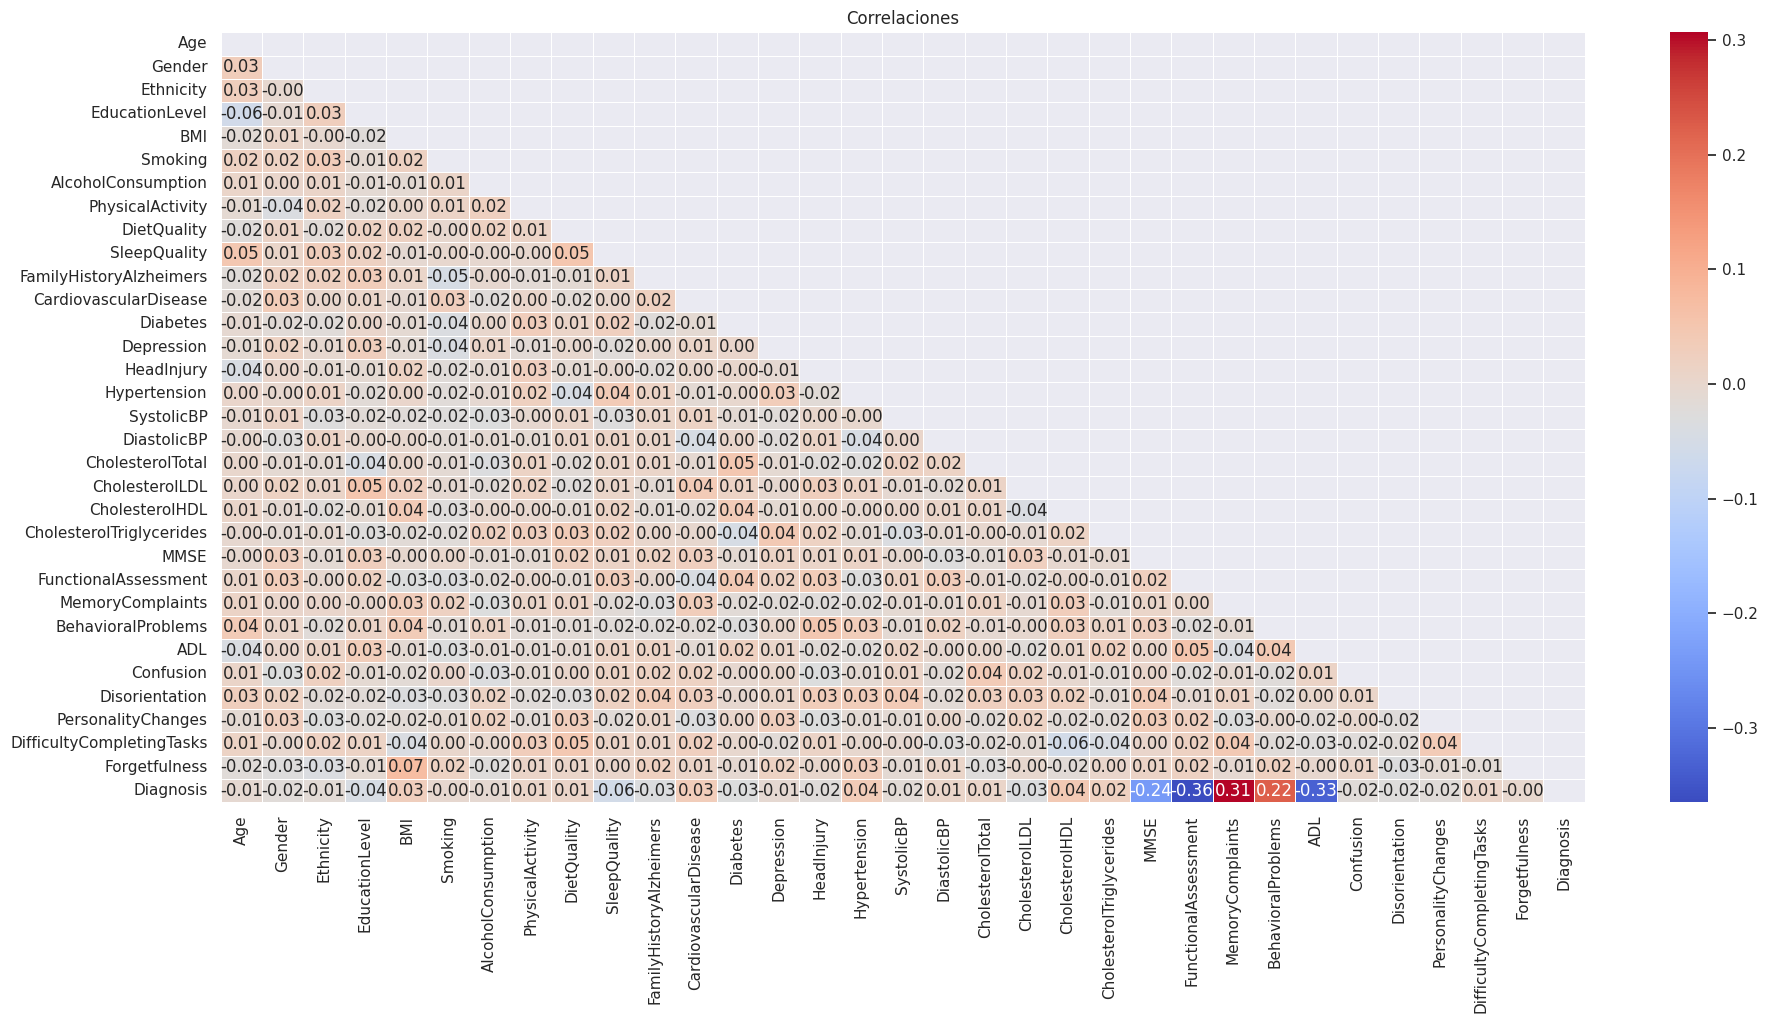

In [50]:
sns.set()
plt.figure(figsize=(22,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.grid(False)
plt.title('Correlaciones')
plt.show()

### Inferencia

#### Variables categoricas

In [51]:
X_cat= data[['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes',
'Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges',
'DifficultyCompletingTasks','Forgetfulness']]
#X=data.drop(columns=['Diagnosis'])
y_cat=data['Diagnosis']
chi_scores = chi2(X_cat, y_cat)
chi2_df = pd.DataFrame({"Feature": X_cat.columns, "Chi2": chi_scores[0], "p-valor": chi_scores[1]})
print(chi2_df.sort_values(by="Chi2", ascending=False))


                      Feature        Chi2       p-valor
10           MemoryComplaints  160.142705  1.053099e-36
11         BehavioralProblems   91.203581  1.296254e-21
2              EducationLevel    2.640277  1.041854e-01
9                Hypertension    2.250784  1.335468e-01
5       CardiovascularDisease    1.823618  1.768832e-01
6                    Diabetes    1.811731  1.783008e-01
4     FamilyHistoryAlzheimers    1.739406  1.872141e-01
13             Disorientation    1.099025  2.944802e-01
8                  HeadInjury    0.893976  3.444022e-01
14         PersonalityChanges    0.776523  3.782066e-01
1                   Ethnicity    0.667702  4.138538e-01
12                  Confusion    0.628701  4.278322e-01
0                      Gender    0.466775  4.944747e-01
15  DifficultyCompletingTasks    0.148688  6.997919e-01
7                  Depression    0.059660  8.070343e-01
3                     Smoking    0.036192  8.491191e-01
16              Forgetfulness    0.000188  9.890

#### Variables numericas

In [52]:
X_num = data[['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','MMSE','FunctionalAssessment','ADL']]
y_num=data['Diagnosis']

t_test =[]
group_0 = X_num[y_num == 0]
group_1 = X_num[y_num == 1]

for column in X_num.columns:
    t_stat, p_val = ttest_ind(group_0[column], group_1[column], nan_policy='omit')
    t_test.append({"Feature": column, "t-stat": t_stat, "p-valor": p_val})
t_test = pd.DataFrame(t_test)
print(t_test.sort_values(by="t-stat", key=abs, ascending=False))

                 Feature     t-stat       p-valor
12  FunctionalAssessment  18.160010  1.134785e-68
13                   ADL  16.327591  1.396884e-56
11                  MMSE  11.309960  7.537248e-29
5           SleepQuality   2.624396  8.741801e-03
10        CholesterolHDL  -1.974954  4.840127e-02
9         CholesterolLDL   1.482381  1.383856e-01
1                    BMI  -1.221037  2.222060e-01
6             SystolicBP   0.723631  4.693709e-01
4            DietQuality  -0.394135  6.935202e-01
2     AlcoholConsumption   0.352994  7.241273e-01
8       CholesterolTotal  -0.296298  7.670310e-01
3       PhysicalActivity  -0.275473  7.829796e-01
0                    Age   0.254312  7.992790e-01
7            DiastolicBP  -0.245244  8.062912e-01


# Visualizacion

In [86]:
cat_levels = {'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']}

for column, levels in cat_levels.items():
    data[column] = data[column].map(dict(enumerate(levels)))
    data[column] = data[column].astype('category', copy=False )

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   int64   
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

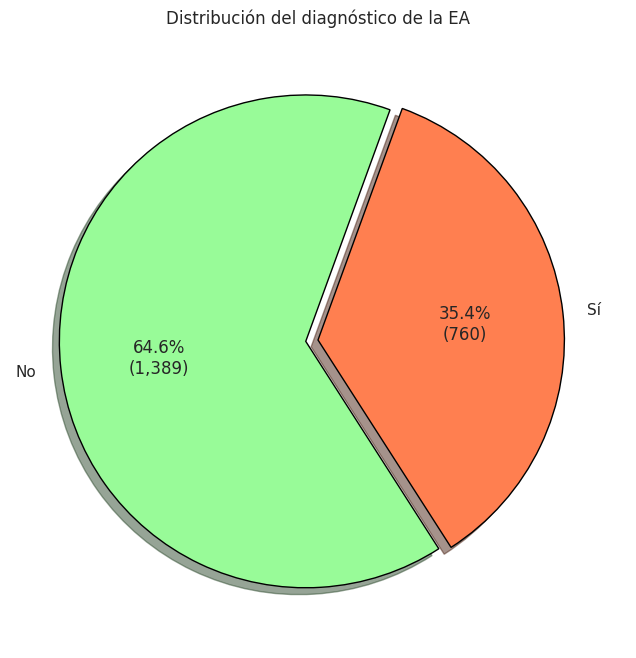

In [55]:
diag = data['Diagnosis'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(diag, labels=['No', 'Sí'], colors = ['palegreen', 'coral'], autopct=lambda p: f'{p:.1f}%\n({int(p * sum(diag) / 100):,})',  startangle=70, explode=[0.05, 0], shadow=True,  wedgeprops={'edgecolor': 'black'})
plt.title("Distribución del diagnóstico de la EA", fontsize=12)
plt.show()

### Demográficas



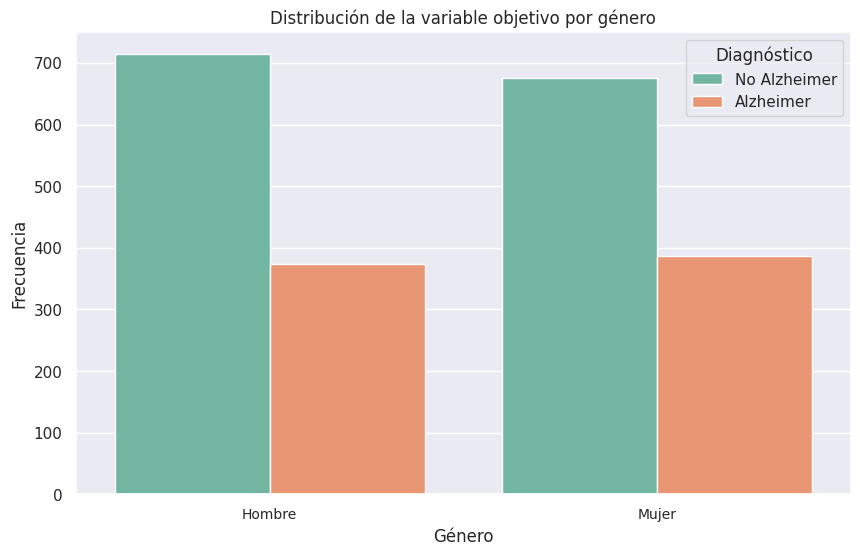

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Diagnosis', data=data, palette='Set2')
plt.title('Distribución de la variable objetivo por género')
plt.xlabel('Género')
plt.xticks([0, 1], ['Hombre', 'Mujer'], fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-58-283fffaeaa77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=data, palette='hls', width=0.6)


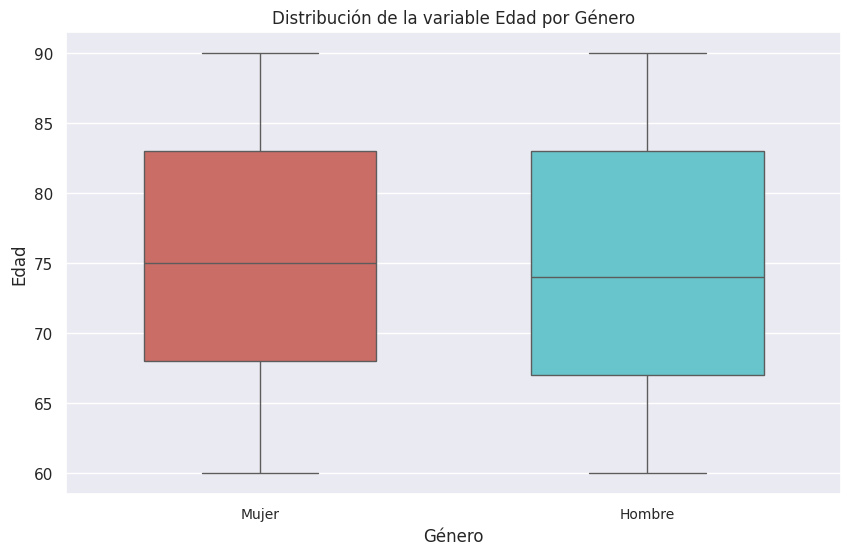

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=data, palette='hls', width=0.6)
plt.title('Distribución de la variable Edad por Género')
plt.xlabel('Género')
plt.xticks([0, 1], ['Mujer','Hombre'], fontsize=10)
plt.ylabel('Edad')
plt.show()

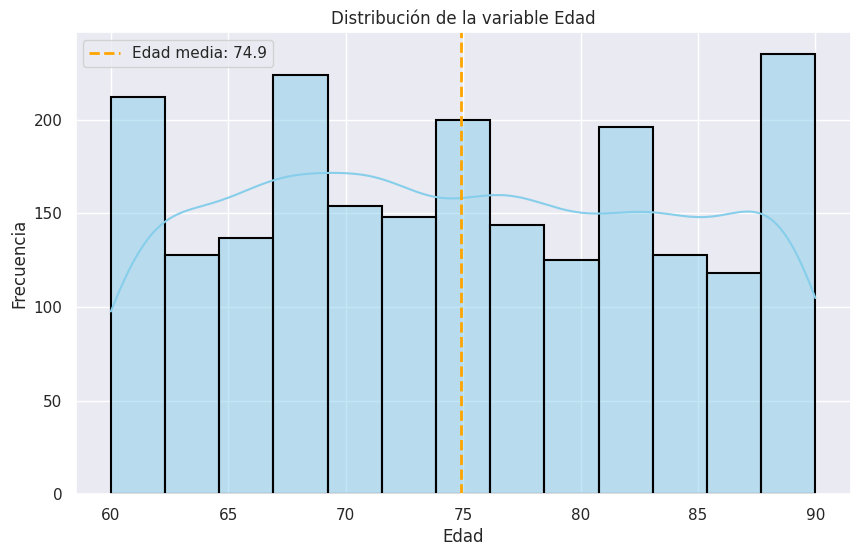

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Distribución de la variable Edad')
mean = data['Age'].mean()
plt.axvline(mean, color='orange', linestyle='--', linewidth=2, label=f'Edad media: {mean:.1f}')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-60-01659a24dccf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Age', data=data, palette='Paired', width=0.6)


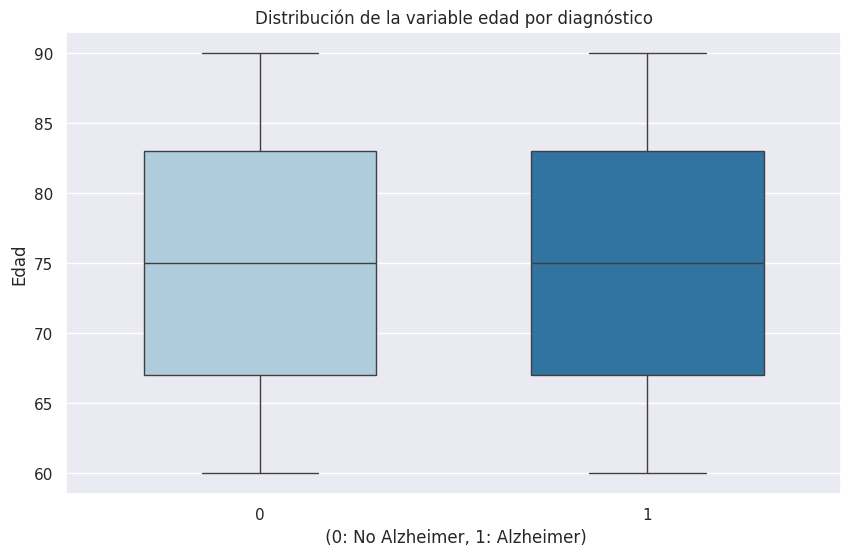

In [60]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.boxplot(x='Diagnosis', y='Age', data=data, palette='Paired', width=0.6)
plt.title('Distribución de la variable edad por diagnóstico')
plt.xlabel(' (0: No Alzheimer, 1: Alzheimer)', fontsize=12)
plt.ylabel('Edad')
plt.show()

Text(0, 0.5, 'Frecuencia')

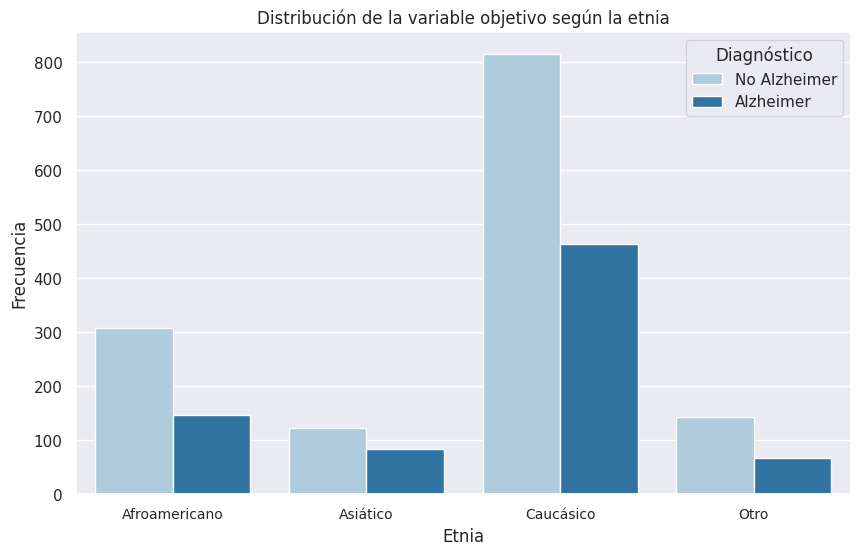

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Ethnicity', hue='Diagnosis', data=data, palette='Paired')
plt.title('Distribución de la variable objetivo según la etnia')
plt.xlabel('Etnia')
plt.xticks([0, 1, 2, 3], ['Afroamericano','Asiático','Caucásico','Otro'], fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

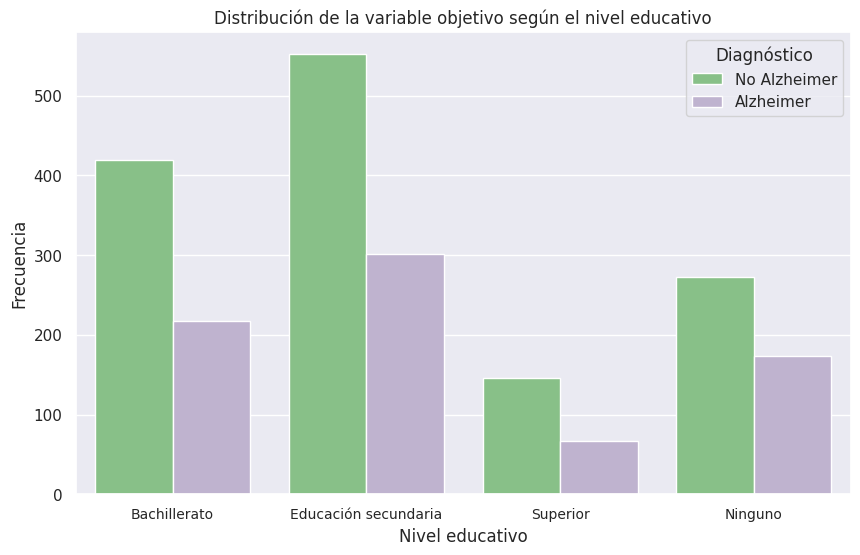

In [62]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EducationLevel', hue='Diagnosis', data=data, palette='Accent')
plt.title('Distribución de la variable objetivo según el nivel educativo')
plt.xlabel('Nivel educativo')
plt.xticks([0, 1, 2, 3], ['Bachillerato','Educación secundaria', 'Superior','Ninguno'], fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
plt.ylabel('Frecuencia')

<ipython-input-63-38a48de7e32a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EducationLevel', y='Age', data=data, palette='Paired', width=0.6)


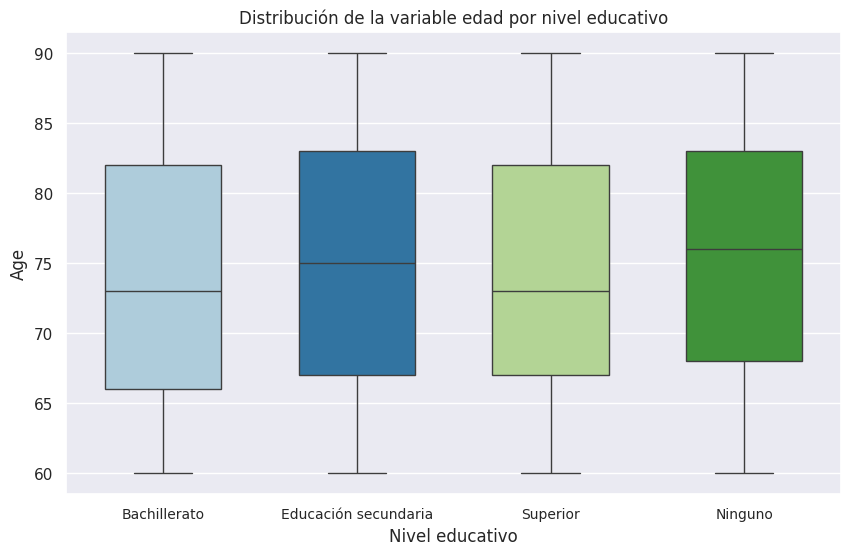

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EducationLevel', y='Age', data=data, palette='Paired', width=0.6)
plt.title('Distribución de la variable edad por nivel educativo')
plt.xlabel('Nivel educativo')
plt.xticks([0, 1, 2, 3], ['Bachillerato','Educación secundaria', 'Superior','Ninguno'], fontsize=10)
plt.ylabel('Age')
plt.show()

### Factores de estilo de vida

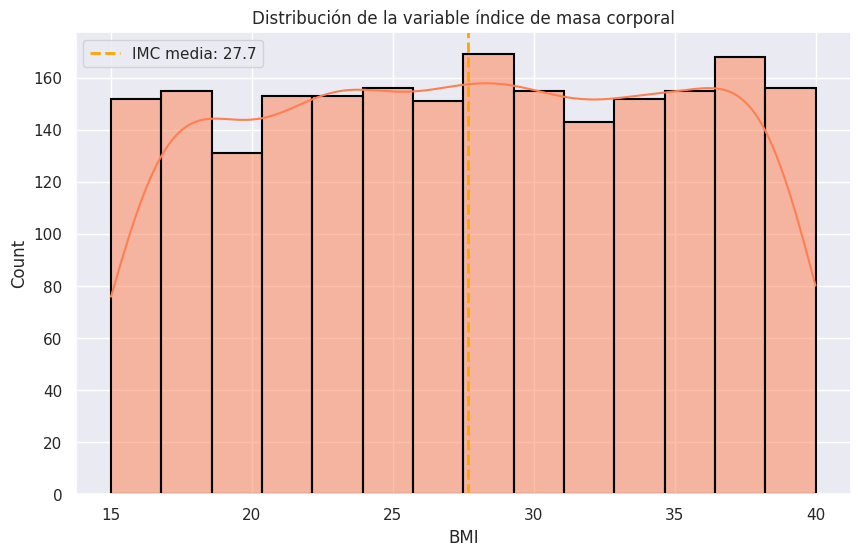

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True, color='coral', edgecolor='black', linewidth=1.5)
plt.title('Distribución de la variable índice de masa corporal')
mean = data['BMI'].mean()
plt.axvline(mean, color='orange', linestyle='--', linewidth=2, label=f'IMC media: {mean:.1f}')
plt.legend()
plt.xlabel('BMI')
plt.show()

<ipython-input-66-b942d3153b3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=data, palette='Paired', width=0.6)


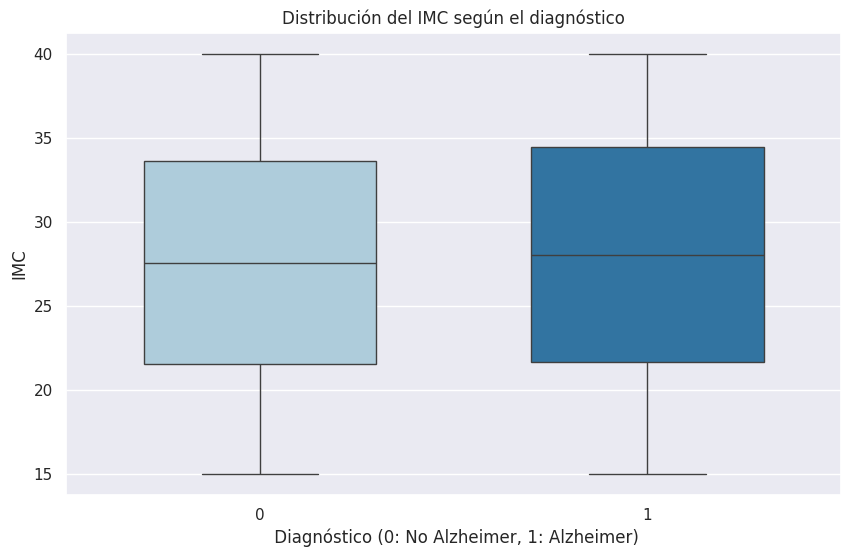

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=data, palette='Paired', width=0.6)
plt.title('Distribución del IMC según el diagnóstico')
plt.xlabel(' Diagnóstico (0: No Alzheimer, 1: Alzheimer)', fontsize=12)
plt.ylabel('IMC')
plt.show()

Text(0, 0.5, 'Frecuencia')

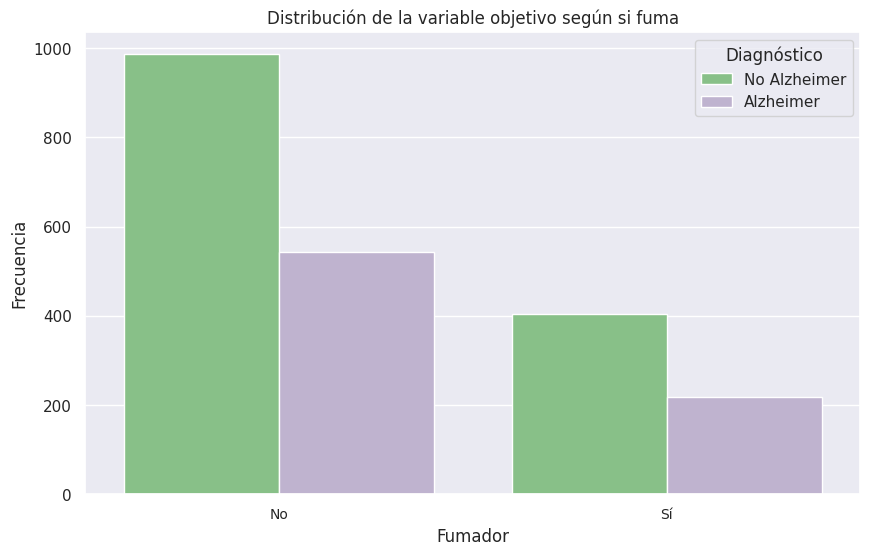

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Smoking', hue='Diagnosis', data=data, palette='Accent')
plt.title('Distribución de la variable objetivo según si fuma')
plt.xlabel('Fumador')
plt.xticks([0, 1], ['No', 'Sí'], fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
plt.ylabel('Frecuencia')

<ipython-input-68-dd2fb6c2e3b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=data, palette='Paired', width=0.6)


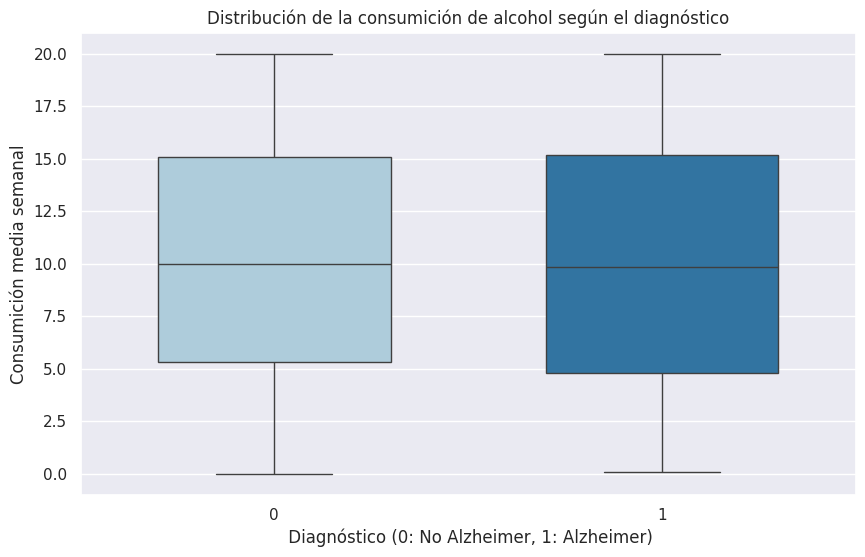

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=data, palette='Paired', width=0.6)
plt.title('Distribución de la consumición de alcohol según el diagnóstico')
plt.xlabel(' Diagnóstico (0: No Alzheimer, 1: Alzheimer)', fontsize=12)
plt.ylabel('Consumición media semanal')
plt.show()

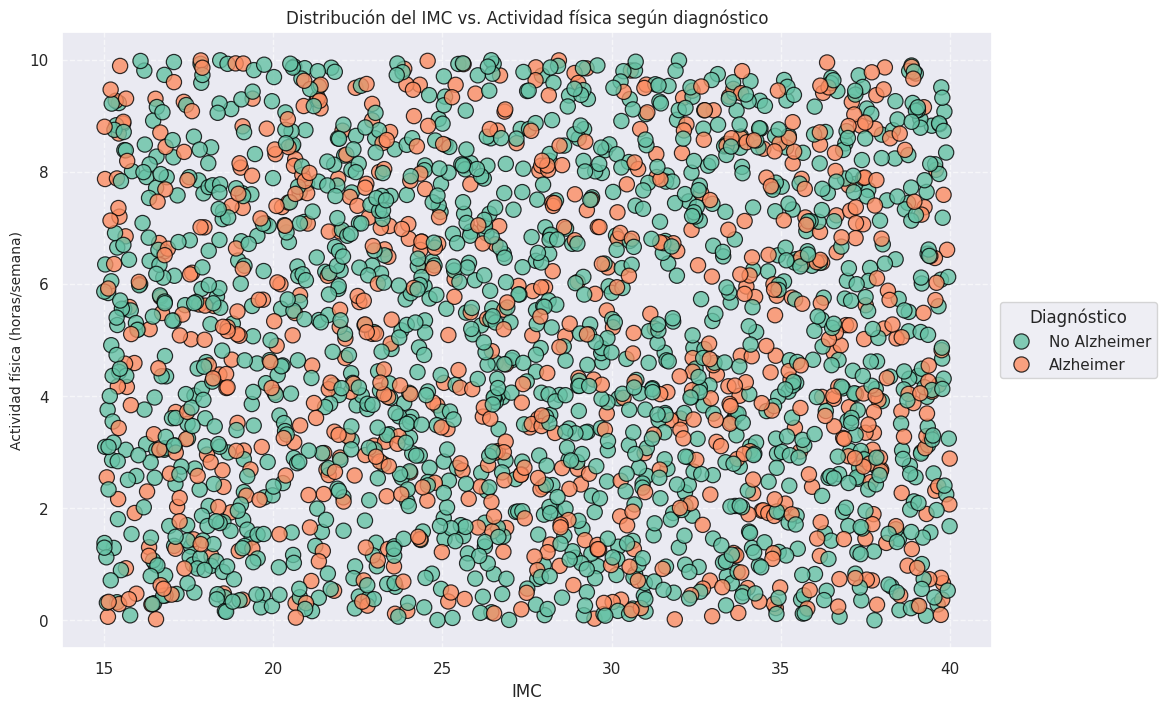

In [69]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='BMI', y='PhysicalActivity', hue='Diagnosis', data=data, palette='Set2', s=120, edgecolor='black', alpha=0.8)
plt.title('Distribución del IMC vs. Actividad física según diagnóstico', fontsize=12)
plt.xlabel('IMC')
plt.ylabel('Actividad física (horas/semana)', fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-70-afacbb203a99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='SleepQuality', data=data, palette='Accent', width=0.6)


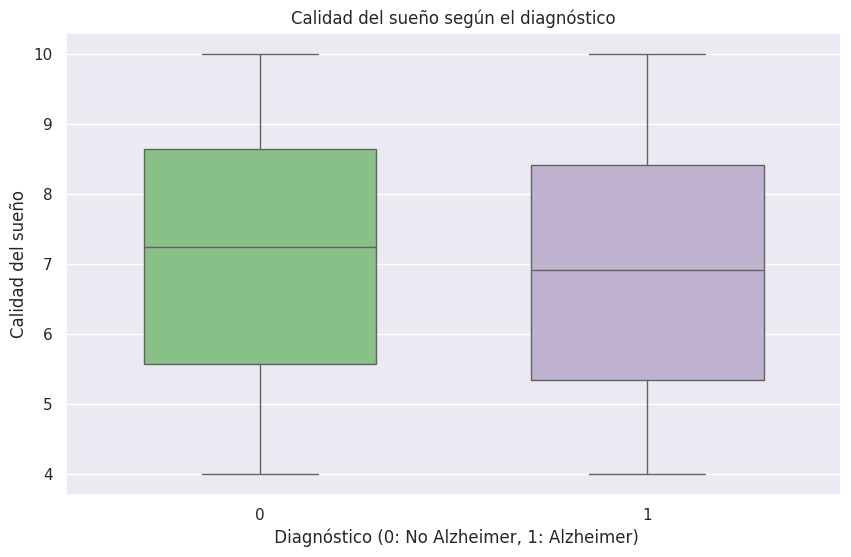

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='SleepQuality', data=data, palette='Accent', width=0.6)
plt.title('Calidad del sueño según el diagnóstico')
plt.xlabel(' Diagnóstico (0: No Alzheimer, 1: Alzheimer)', fontsize=12)
plt.ylabel('Calidad del sueño')
plt.show()

### Historial medico

Text(0, 0.5, 'Frecuencia')

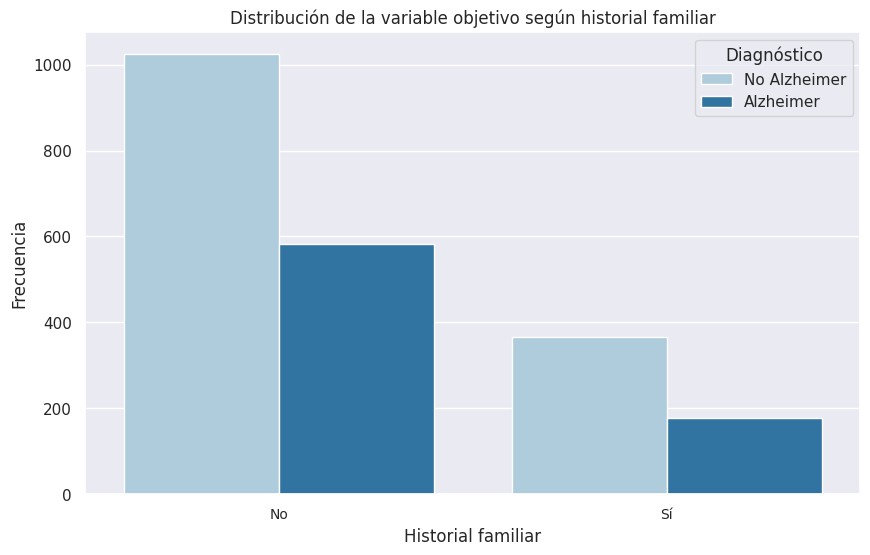

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=data, palette='Paired')
plt.title('Distribución de la variable objetivo según historial familiar')
plt.xlabel('Historial familiar')
plt.xticks([0, 1], ['No', 'Sí'], fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
plt.ylabel('Frecuencia')

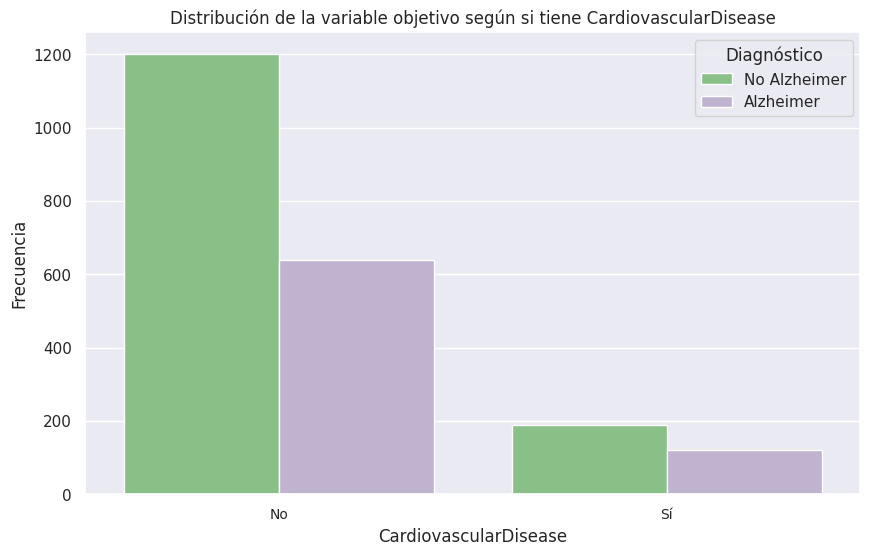

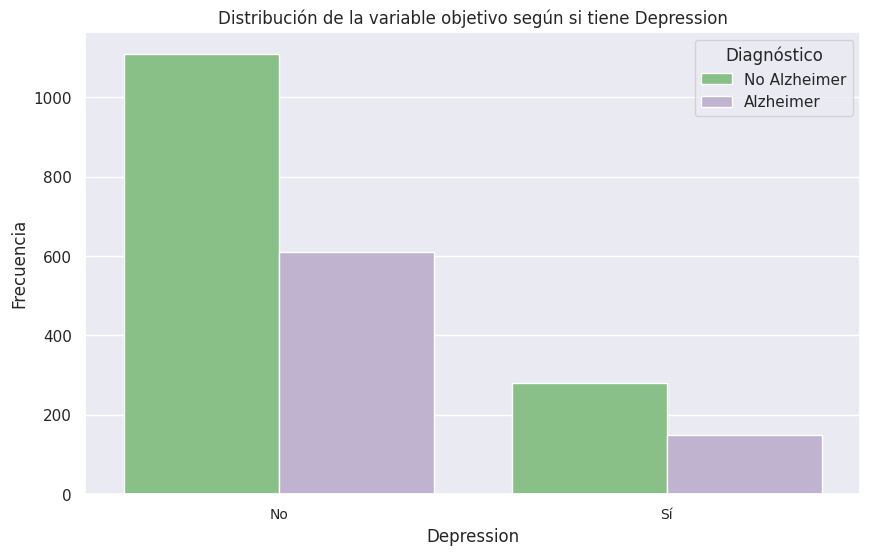

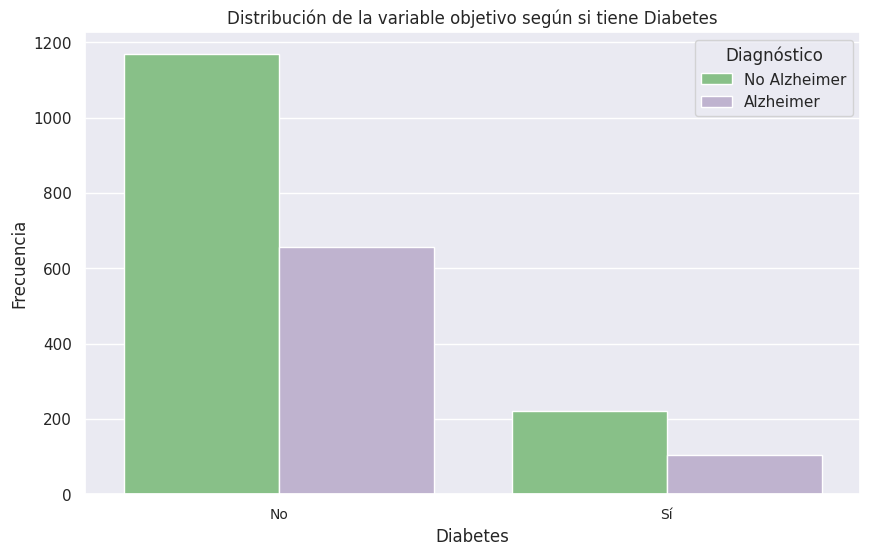

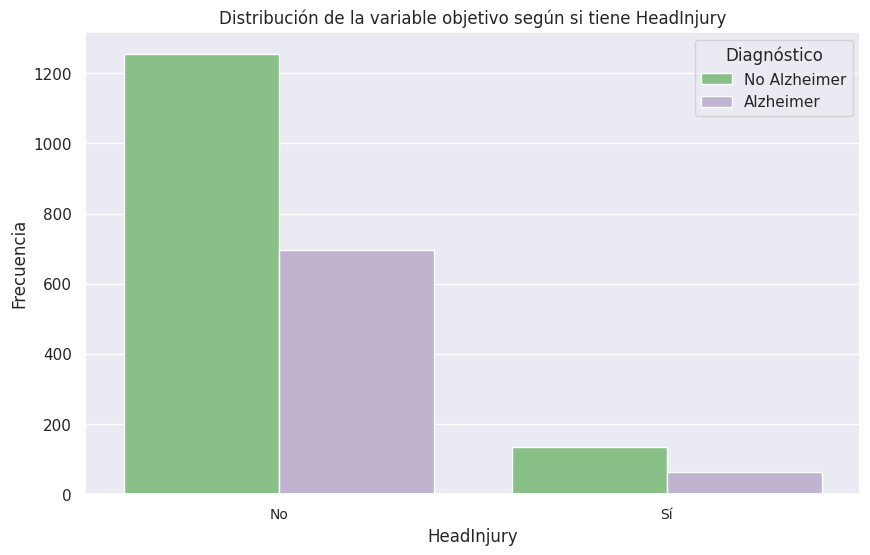

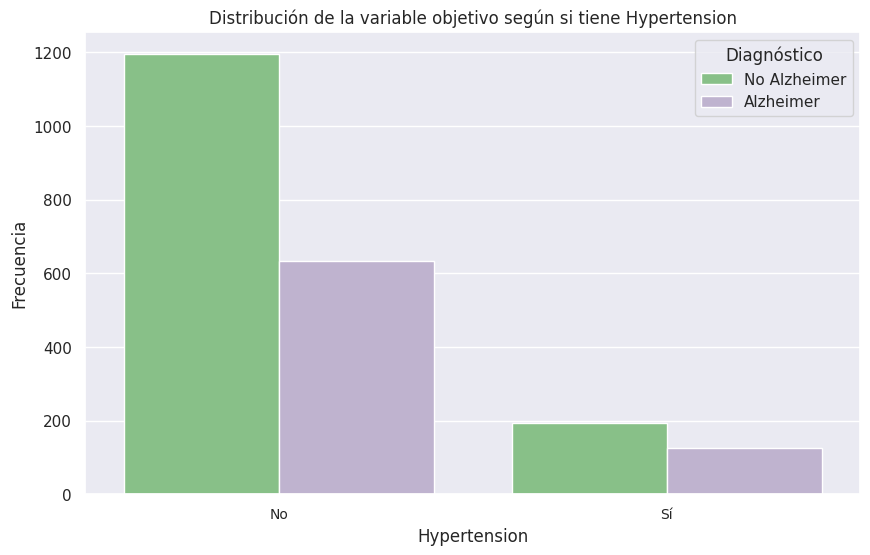

In [72]:
var_hm= ['CardiovascularDisease', 'Depression', 'Diabetes','HeadInjury','Hypertension']
for var in var_hm:
  plt.figure(figsize=(10, 6))
  ax = sns.countplot(x=var, hue='Diagnosis', data=data, palette='Accent')
  plt.title(f'Distribución de la variable objetivo según si tiene {var}')
  plt.xlabel(var)
  plt.xticks([0, 1], ['No', 'Sí'], fontsize=10)
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
  plt.ylabel('Frecuencia')

### Mediciones clinicas

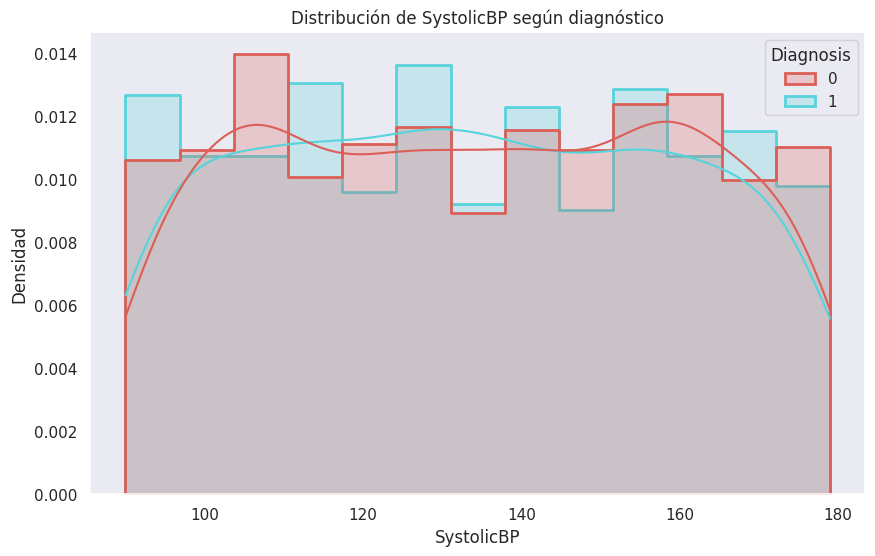

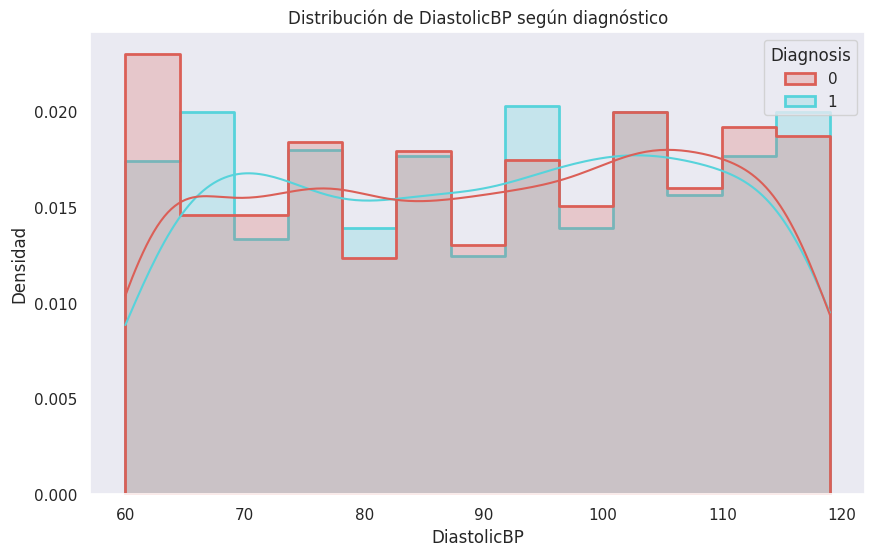

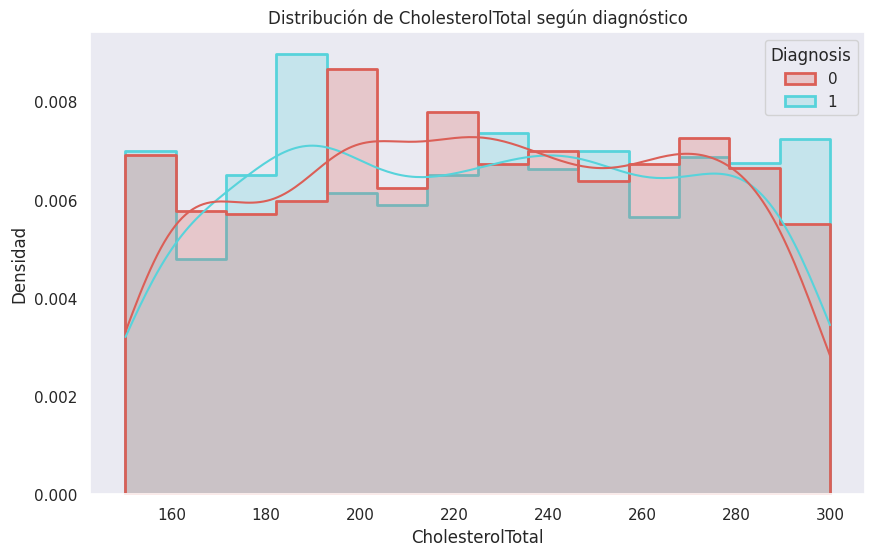

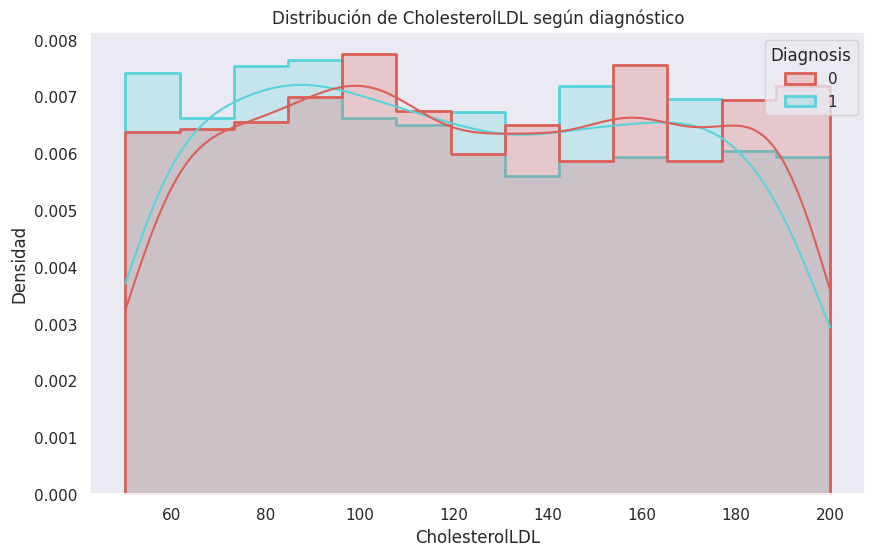

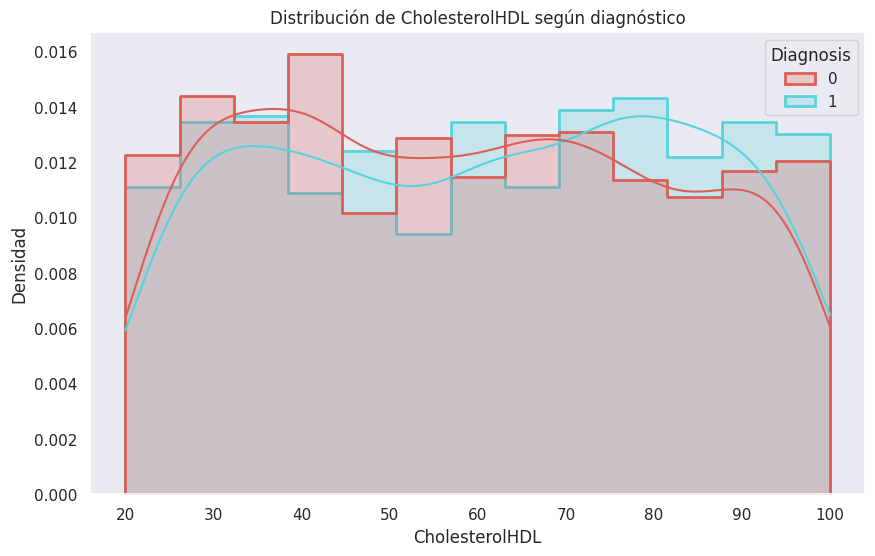

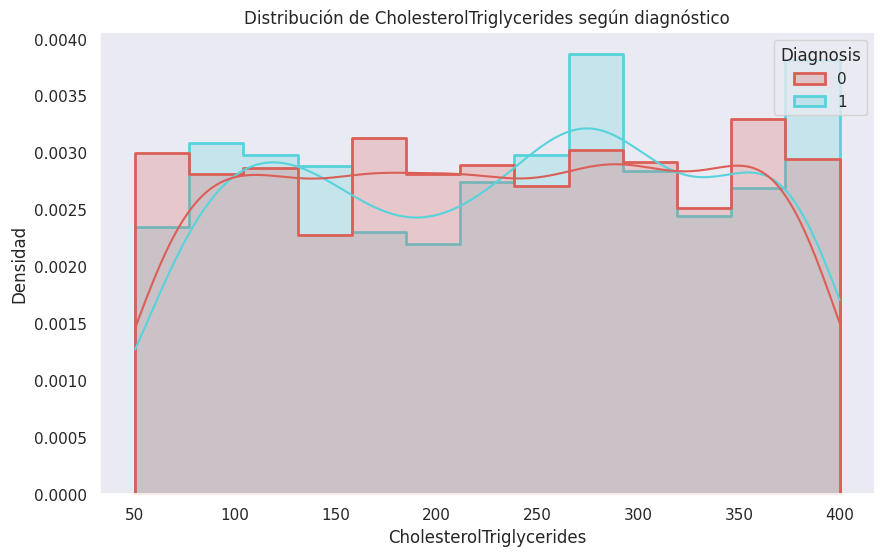

In [73]:
var_mc = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal','CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
for var in var_mc:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, hue='Diagnosis', kde=True, element='step',  stat='density', common_norm=False, palette='hls', linewidth=2)
    plt.title(f'Distribución de {var} según diagnóstico', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.grid(False)
    plt.show()

### Evaluaciones cognitivas y funcionales

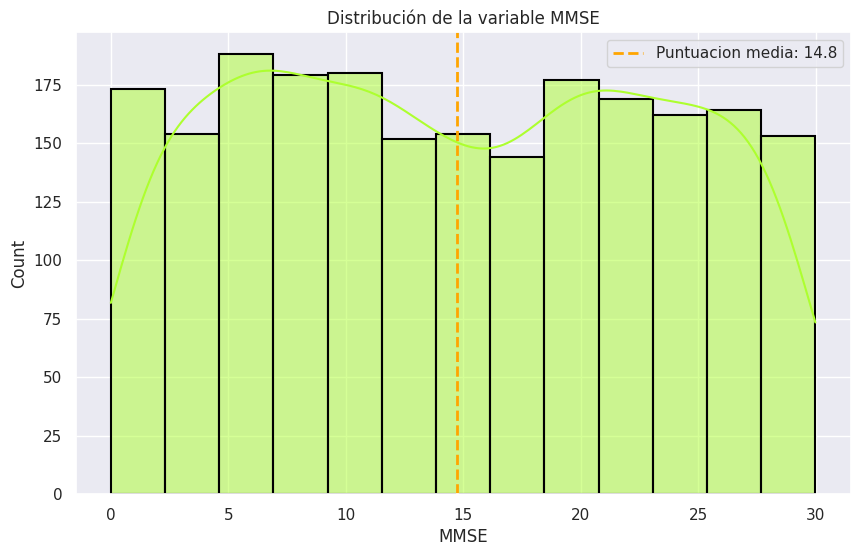

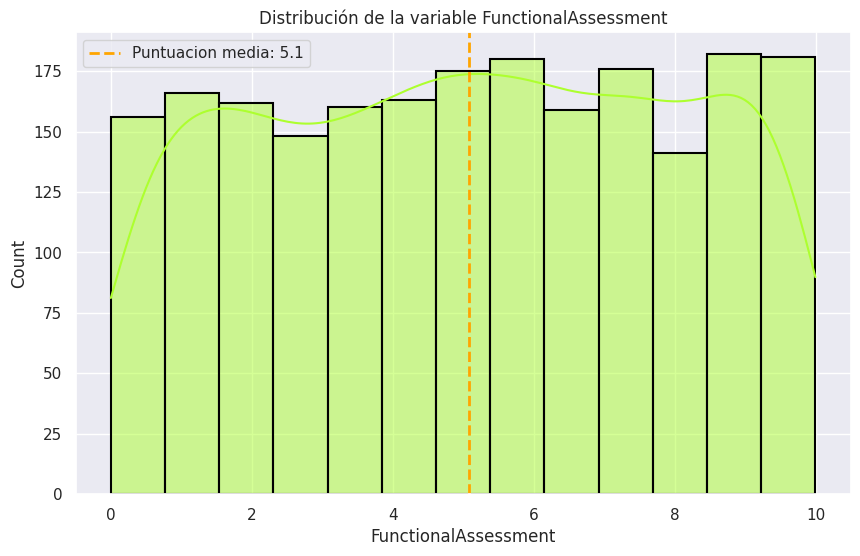

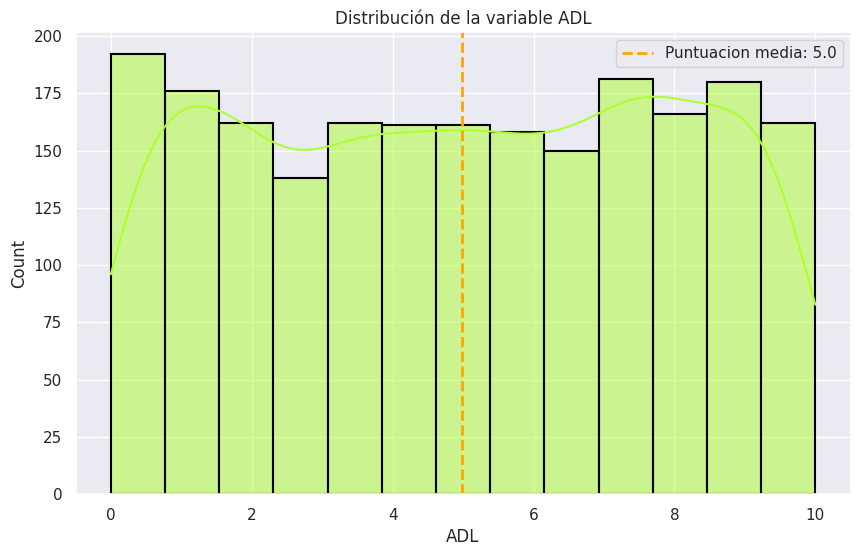

In [74]:
var_ev=['MMSE','FunctionalAssessment','ADL']
for var in var_ev:
  plt.figure(figsize=(10, 6))
  sns.histplot(data = data, x=var, kde=True, color='greenyellow', edgecolor='black', linewidth=1.5)
  plt.title(f'Distribución de la variable {var}')
  mean = data[var].mean()
  plt.axvline(mean, color='orange', linestyle='--', linewidth=2, label=f'Puntuacion media: {mean:.1f}')
  plt.legend()
  plt.xlabel(var)
  plt.show()

<ipython-input-76-a9998d8296d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=var, data=data, palette='Accent', width=0.6)


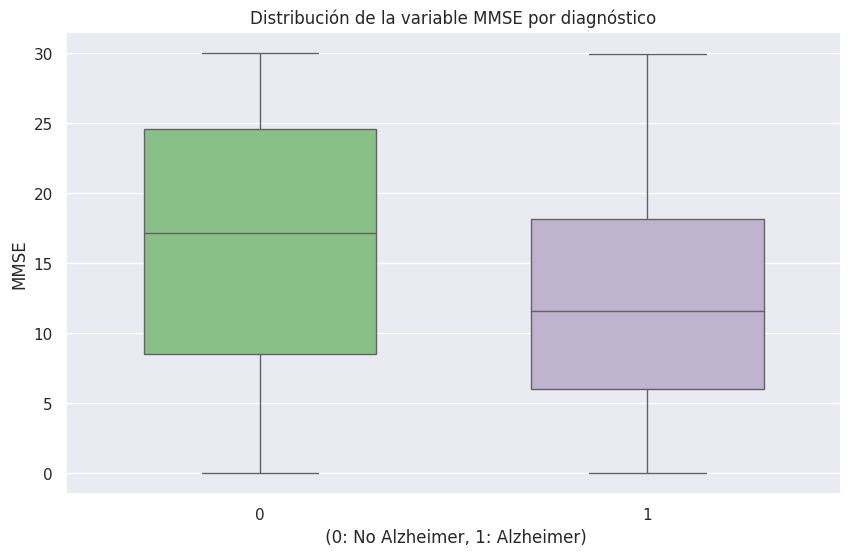

<ipython-input-76-a9998d8296d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=var, data=data, palette='Accent', width=0.6)


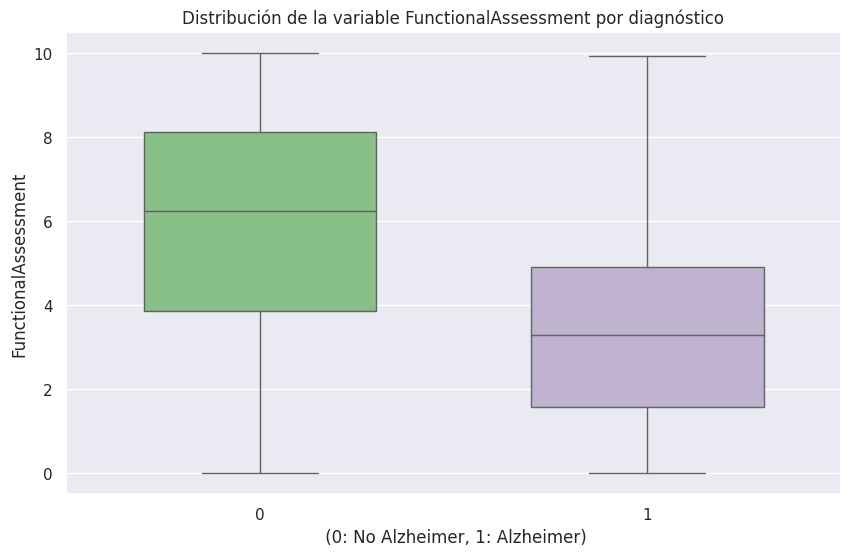

<ipython-input-76-a9998d8296d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=var, data=data, palette='Accent', width=0.6)


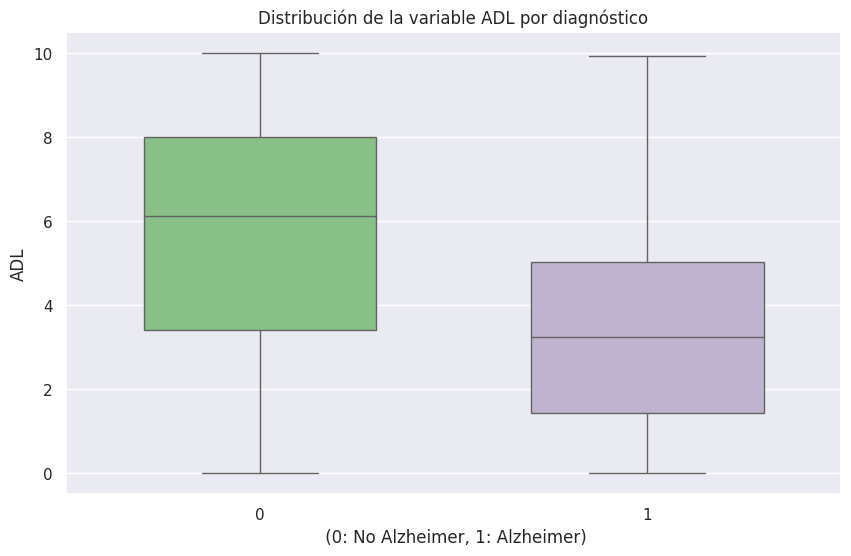

In [76]:
for var in var_ev:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Diagnosis', y=var, data=data, palette='Accent', width=0.6)
  plt.title(f'Distribución de la variable {var} por diagnóstico')
  plt.xlabel(' (0: No Alzheimer, 1: Alzheimer)', fontsize=12)
  plt.ylabel(var)
  plt.show()

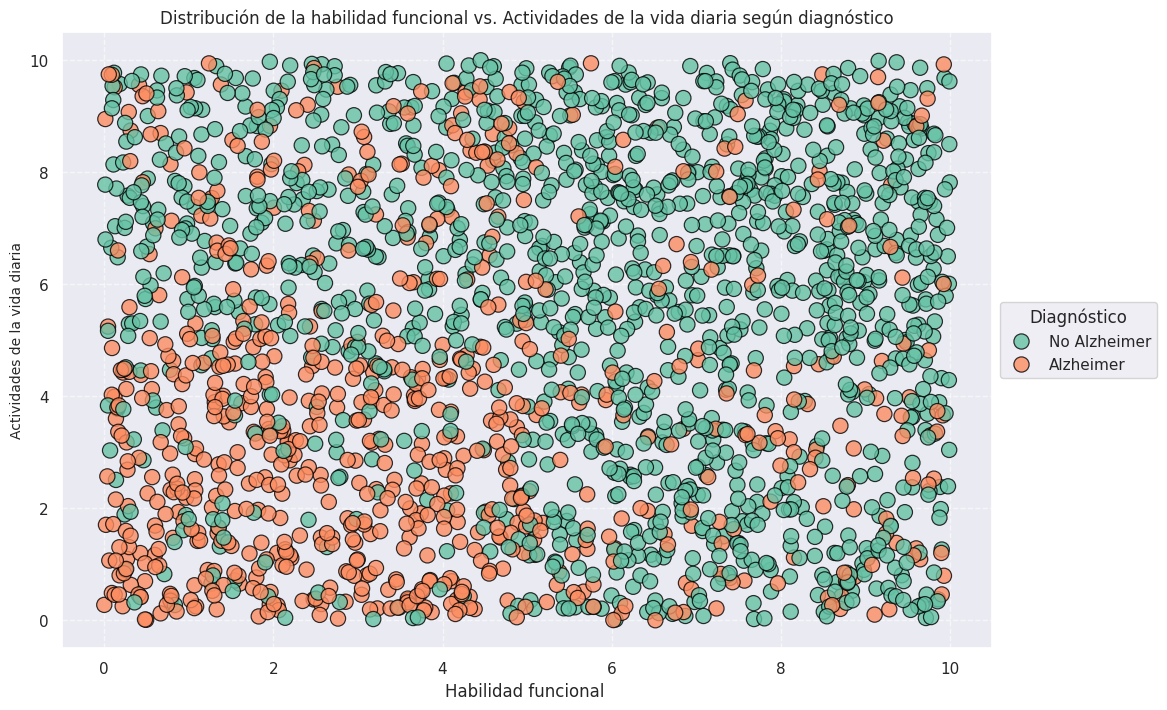

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FunctionalAssessment', y='ADL', hue='Diagnosis', data=data, palette='Set2', s=120, edgecolor='black', alpha=0.8)
plt.title('Distribución de la habilidad funcional vs. Actividades de la vida diaria según diagnóstico', fontsize=12)
plt.xlabel('Habilidad funcional ')
plt.ylabel('Actividades de la vida diaria', fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Sintomas

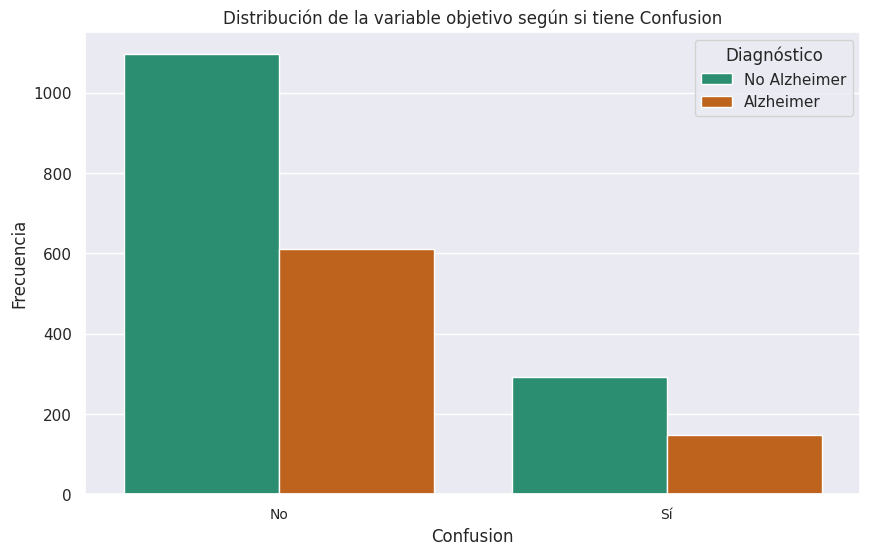

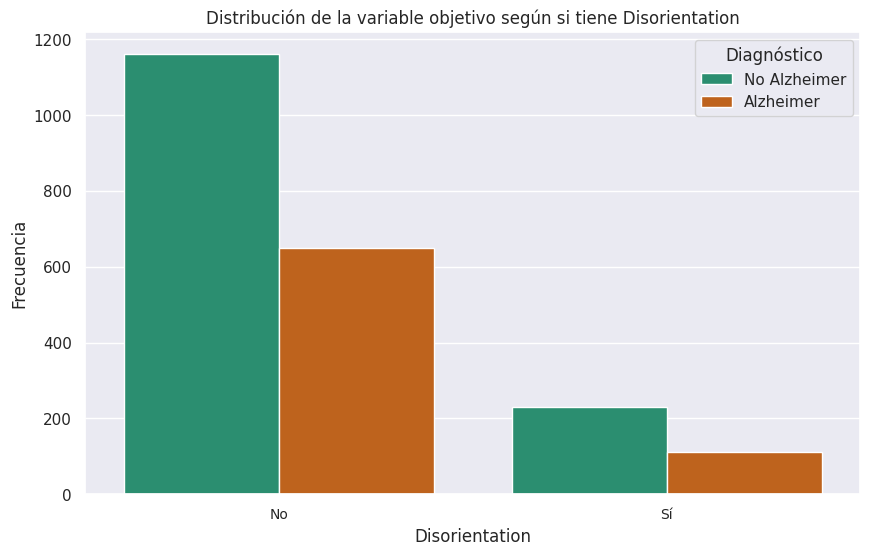

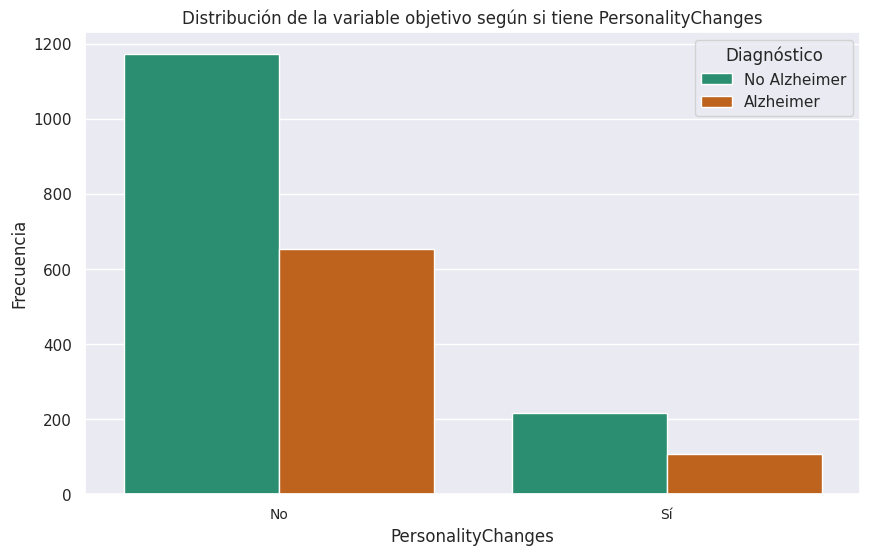

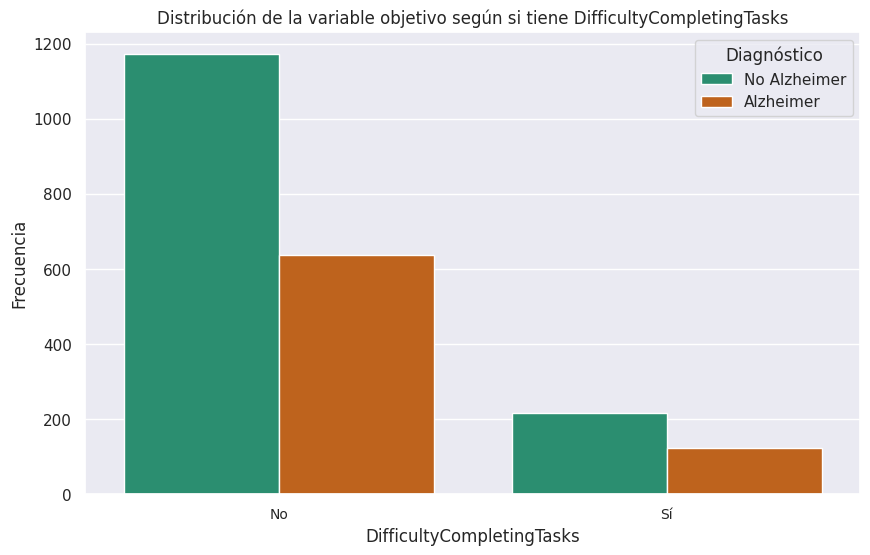

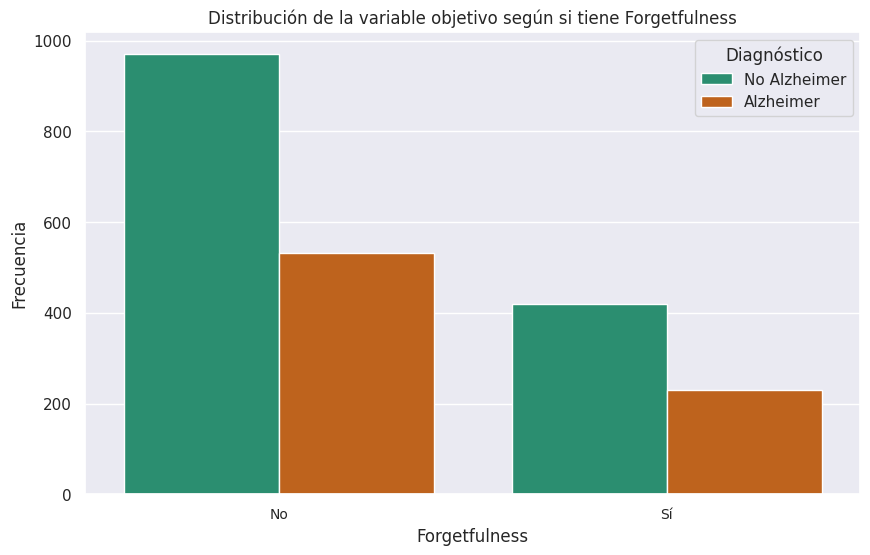

In [78]:
var_sin= ['Confusion', 'Disorientation', 'PersonalityChanges','DifficultyCompletingTasks','Forgetfulness']
for var in var_sin:
  plt.figure(figsize=(10, 6))
  ax = sns.countplot(x=var, hue='Diagnosis', data=data, palette='Dark2')
  plt.title(f'Distribución de la variable objetivo según si tiene {var}')
  plt.xlabel(var)
  plt.xticks([0, 1], ['No', 'Sí'], fontsize=10)
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnóstico')
  plt.ylabel('Frecuencia')

# Prepocesamiento

## Valores nulos


In [79]:
pd.isnull(data).sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: int64

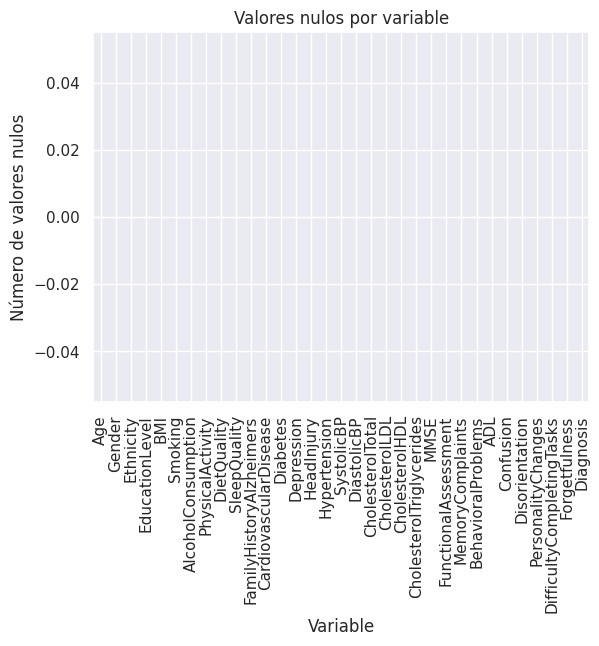

In [80]:
(data.isnull().sum()).plot.bar()
plt.title('Valores nulos por variable')
plt.xlabel('Variable')
plt.ylabel('Número de valores nulos')
plt.show()

##Outliers

In [90]:
for variable in data.select_dtypes(include='number').columns:
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    outliers = ((data[variable] < lower) | (data[variable] > upper)).sum()

    print(f"{variable}: {outliers} outliers")

Age: 0 outliers
BMI: 0 outliers
AlcoholConsumption: 0 outliers
PhysicalActivity: 0 outliers
DietQuality: 0 outliers
SleepQuality: 0 outliers
SystolicBP: 0 outliers
DiastolicBP: 0 outliers
CholesterolTotal: 0 outliers
CholesterolLDL: 0 outliers
CholesterolHDL: 0 outliers
CholesterolTriglycerides: 0 outliers
MMSE: 0 outliers
FunctionalAssessment: 0 outliers
ADL: 0 outliers
Diagnosis: 0 outliers
Gender_Male: 0 outliers
Ethnicity_Asian: 206 outliers
Ethnicity_Caucasian: 0 outliers
Ethnicity_Other: 211 outliers
EducationLevel_High School: 0 outliers
EducationLevel_Higher: 213 outliers
EducationLevel_None: 446 outliers
Smoking_Yes: 0 outliers
FamilyHistoryAlzheimers_Yes: 0 outliers
CardiovascularDisease_Yes: 310 outliers
Diabetes_Yes: 324 outliers
Depression_Yes: 431 outliers
HeadInjury_Yes: 199 outliers
Hypertension_Yes: 320 outliers
MemoryComplaints_Yes: 447 outliers
BehavioralProblems_Yes: 337 outliers
Confusion_Yes: 441 outliers
Disorientation_Yes: 340 outliers
PersonalityChanges_Yes: 32

In [82]:
data.head()

Age  Gender  Ethnicity EducationLevel        BMI Smoking  \
0   73    Male  Caucasian     Bachelor's  22.927749      No   
1   89    Male  Caucasian           None  26.827681      No   
2   73    Male      Other    High School  17.795882      No   
3   74  Female  Caucasian    High School  33.800817     Yes   
4   89    Male  Caucasian           None  20.716974      No   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

  FunctionalAssessment MemoryComplaints BehavioralProblems       ADL  \
0             6.518877               No                 No  1.725883   
1             7.118696               No                 No  2.592424   
2             5.895077               No                 No  7.119548   
3             8.965106               No                Yes  6.481226   
4             6.045039               No                 No  0.014691   

  Confusion Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        No             No                  No                        Yes   
1        No             No                  No                         No   
2        No            Yes                  No                        Yes   
3        No             No                  No                         No   
4        No             No                 Yes                        Yes   

   Forgetfulness  Diagnosis  
0             No          0  
1            Yes          0  
2             No          0  
3             No          0  
4             No          0  

[5 rows x 33 columns]

## Estandarizacion

In [88]:
num = data.select_dtypes(exclude=['category']).columns.tolist()
num.remove('Diagnosis')
scaler = StandardScaler()
data[num] = scaler.fit_transform(data[num])

## Transformacion de variables categoricas

In [89]:
cat = data.select_dtypes(include=['category']).columns.tolist()
data = pd.get_dummies(data, columns=cat, drop_first=True, dtype = float)

In [ ]:
data.head()

Age       BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0 -0.212368 -0.655225            0.565923          0.492525    -1.253593   
1  1.567757 -0.114751           -0.954895          0.945093    -1.538442   
2 -0.212368 -1.366428            1.653006          1.023896    -1.088855   
3 -0.101111  0.851625            0.376930          1.227995     0.839804   
4  1.567757 -0.961607            1.461793          0.486696    -1.443293   

   SleepQuality  SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
0      1.119918    0.298159    -1.014750          0.403677       -1.572661   
1      0.056836   -0.742572    -1.469595          0.140248        1.593119   
2      1.487380   -1.359301     1.486898          1.386812        0.668569   
3      0.760833   -0.626935     1.430043         -1.542715       -1.360103   
4     -0.824566   -1.552029     1.543754          0.291653       -0.725756   

   ...  Depression_Yes  HeadInjury_Yes  Hypertension_Yes  \
0  ...             1.0             0.0               0.0   
1  ...             0.0             0.0               0.0   
2  ...             0.0             0.0               0.0   
3  ...             0.0             0.0               0.0   
4  ...             0.0             0.0               0.0   

   MemoryComplaints_Yes  BehavioralProblems_Yes  Confusion_Yes  \
0                   0.0                     0.0            0.0   
1                   0.0                     0.0            0.0   
2                   0.0                     0.0            0.0   
3                   0.0                     1.0            0.0   
4                   0.0                     0.0            0.0   

   Disorientation_Yes  PersonalityChanges_Yes  DifficultyCompletingTasks_Yes  \
0                 0.0                     0.0                            1.0   
1                 0.0                     0.0                            0.0   
2                 1.0                     0.0                            1.0   
3                 0.0                     0.0                            0.0   
4                 0.0                     1.0                            1.0   

   Forgetfulness_Yes  
0                0.0  
1                1.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 37 columns]

## Seleccion de caracteristicas

 #### ANOVA

In [91]:
best = SelectKBest(f_classif, k=15)
X_selected = best.fit_transform(X, y)
selected_features = list(X.columns[best.get_support()])
print("Características Seleccionadas:", selected_features)

Características Seleccionadas: ['SleepQuality', 'CholesterolLDL', 'CholesterolHDL', 'MMSE', 'FunctionalAssessment', 'ADL', 'Ethnicity_Asian', 'EducationLevel_Higher', 'EducationLevel_None', 'FamilyHistoryAlzheimers_Yes', 'CardiovascularDisease_Yes', 'Diabetes_Yes', 'Hypertension_Yes', 'MemoryComplaints_Yes', 'BehavioralProblems_Yes']


#### ACP

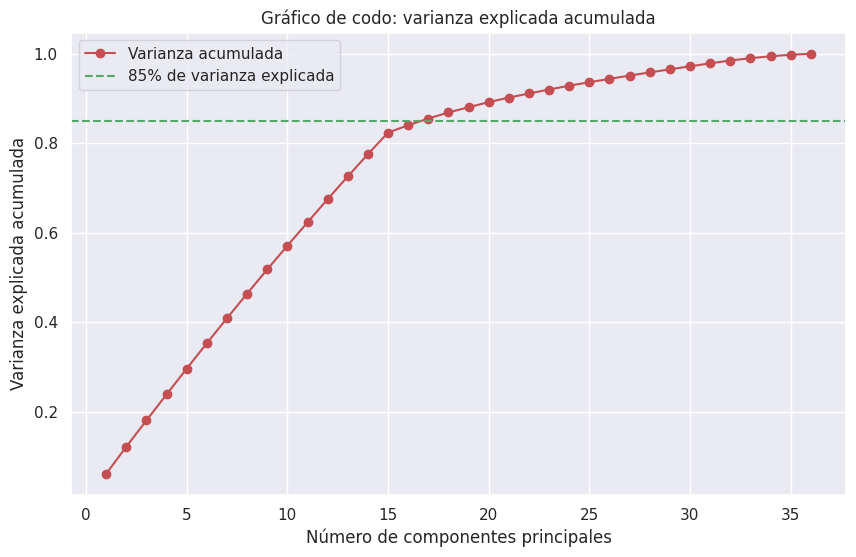

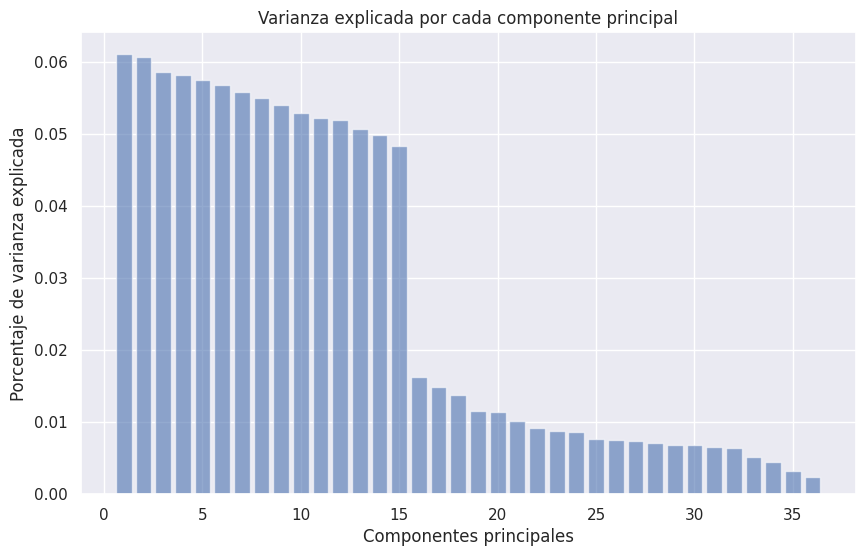

In [93]:
pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de codo: varianza explicada acumulada')
plt.axhline(y=0.85, color='g', linestyle='--', label='85% de varianza explicada')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

In [94]:
pca = PCA(n_components=17)  # numero de componentes principales seleccionadas
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)
print("Varianza explicada total:", sum(explained_variance))

Varianza explicada por cada componente principal: [0.0610818  0.06074436 0.05856681 0.05826778 0.05756369 0.05675297
 0.05585719 0.05503435 0.05402368 0.05294761 0.05221441 0.05197073
 0.05066085 0.0498081  0.04830808 0.01632577 0.01494035]
Varianza explicada total: 0.8550685273584921


In [95]:
print("\nComparacion de caracteristicas seleccionadas:")
print("ANOVA:", selected_features)
print("PCA:", [f"PC{i+1}" for i in range(len(explained_variance))])


Comparacion de caracteristicas seleccionadas:
ANOVA: ['SleepQuality', 'CholesterolLDL', 'CholesterolHDL', 'MMSE', 'FunctionalAssessment', 'ADL', 'Ethnicity_Asian', 'EducationLevel_Higher', 'EducationLevel_None', 'FamilyHistoryAlzheimers_Yes', 'CardiovascularDisease_Yes', 'Diabetes_Yes', 'Hypertension_Yes', 'MemoryComplaints_Yes', 'BehavioralProblems_Yes']
PCA: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']


In [96]:
selected_features.extend(['Age', 'Gender_Male'])

##Division conjunto test y entrenamiento

In [97]:
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.35, random_state=42, shuffle = True)

In [98]:
print(f"X Train :{X_train.shape}")
print(f"X Test :{X_test.shape}")
print(f"y Train :{y_train.shape}")
print(f"y Test :{y_test.shape}")

X Train :(1396, 17)
X Test :(753, 17)
y Train :(1396,)
y Test :(753,)


# Machine Learning

## Regresion logistica

In [99]:
model_log = LogisticRegression()

In [100]:
# Hiperparámetros para optimizar el modelo
param_grid_rl = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [101]:
#Búsqueda del mejor hiperparámetro
grid_search_rl = GridSearchCV(estimator=model_log,
                              param_grid=param_grid_rl,
                              cv=5,
                              scoring='accuracy')
# Entrenamiento del modelo con los datos de entrenamiento
grid_search_rl.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [102]:
best_rl = grid_search_rl.best_estimator_
print("Mejores hiperparámetros encontrados con búsqueda en grid:", best_rl)


Mejores hiperparámetros encontrados con búsqueda en grid: LogisticRegression(C=0.1, penalty='l1', solver='saga')


In [103]:
# Construcción del modelo con los mejores hiperparametros
rl_pred = best_rl.predict(X_test)
print(classification_report(y_test, rl_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       473
           1       0.82      0.70      0.75       280

    accuracy                           0.83       753
   macro avg       0.83      0.80      0.81       753
weighted avg       0.83      0.83      0.83       753



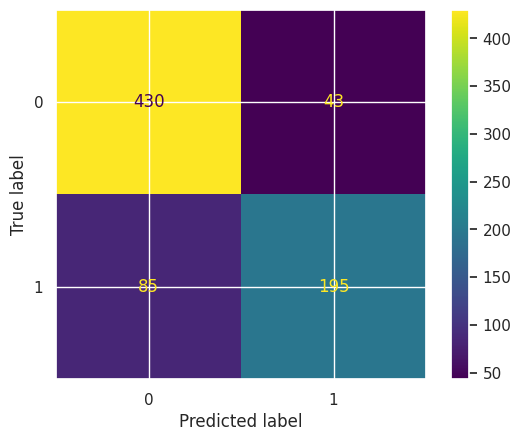

In [104]:
# Matriz de confusion
ConfusionMatrixDisplay.from_estimator(best_rl, X_test, y_test)

## Random Forest

In [105]:
# Modelo
rf_model= RandomForestClassifier()
estimators = 50
random_f = RandomForestClassifier(n_estimators=estimators, random_state=42)


In [106]:
# Hiperparametros para optimizar el modelo
param_grid_rf = {
    'n_estimators': [1, 50, 100, 200],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [107]:
#Busqueda del mejor hiperparametro
grid_search_rf = GridSearchCV(estimator=random_f,
                           param_grid=param_grid_rf,
                           scoring='accuracy',
                           cv=3)
# Entrenamiento del modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 50, 100, 200]},
             scoring='accuracy')

In [108]:
best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros encontrados con búsqueda en grid:", best_rf)


Mejores hiperparámetros encontrados con búsqueda en grid: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)


In [109]:
# Construccion del modelo con los mejores hiperparametros
rf_pred = best_rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       473
           1       0.95      0.85      0.90       280

    accuracy                           0.93       753
   macro avg       0.94      0.91      0.92       753
weighted avg       0.93      0.93      0.93       753



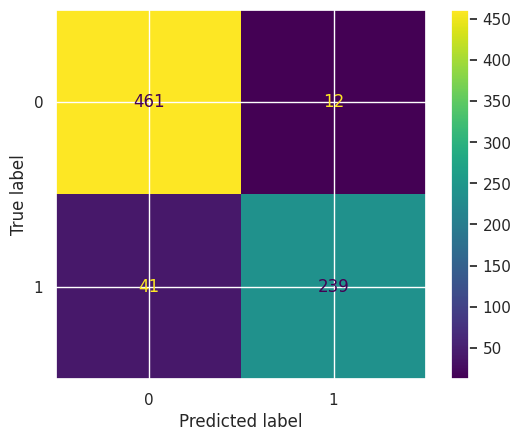

In [110]:
# Matriz de confusion
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

In [111]:
print("Exactitud: ", accuracy_score(y_test,rf_pred))

Exactitud:  0.9296148738379814


## Support Vector Machine

In [112]:
svm_model = SVC (probability=True)

In [113]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [114]:
# Búsqueda del mejor hiperparámetro
grid_search_svm = GridSearchCV(estimator=svm_model,
                           param_grid=param_grid_svm,
                           scoring='accuracy',
                           cv=3)

# Entrenamiento del modelo con los datos de entrenamiento
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [115]:
best_svm = grid_search_svm.best_estimator_
print("Mejores hiperparámetros encontrados con búsqueda en grid:", best_svm)
print("Kernel seleccionado:", best_svm.kernel)


Mejores hiperparámetros encontrados con búsqueda en grid: SVC(C=10, gamma='auto', probability=True)
Kernel seleccionado: rbf


In [116]:
svm_pred = best_svm.predict(X_test)
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       473
           1       0.82      0.73      0.77       280

    accuracy                           0.84       753
   macro avg       0.83      0.82      0.82       753
weighted avg       0.84      0.84      0.84       753



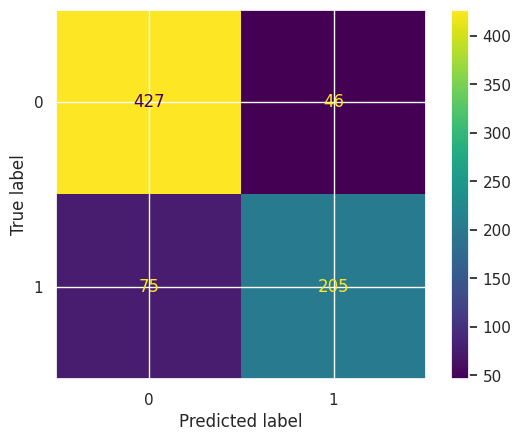

In [117]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test)

In [118]:
print("Exactitud: ", accuracy_score(y_test,svm_pred))

Exactitud:  0.8393094289508632


## Variables relevantes en cada modelo

<ipython-input-119-5a4780e9f683>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')


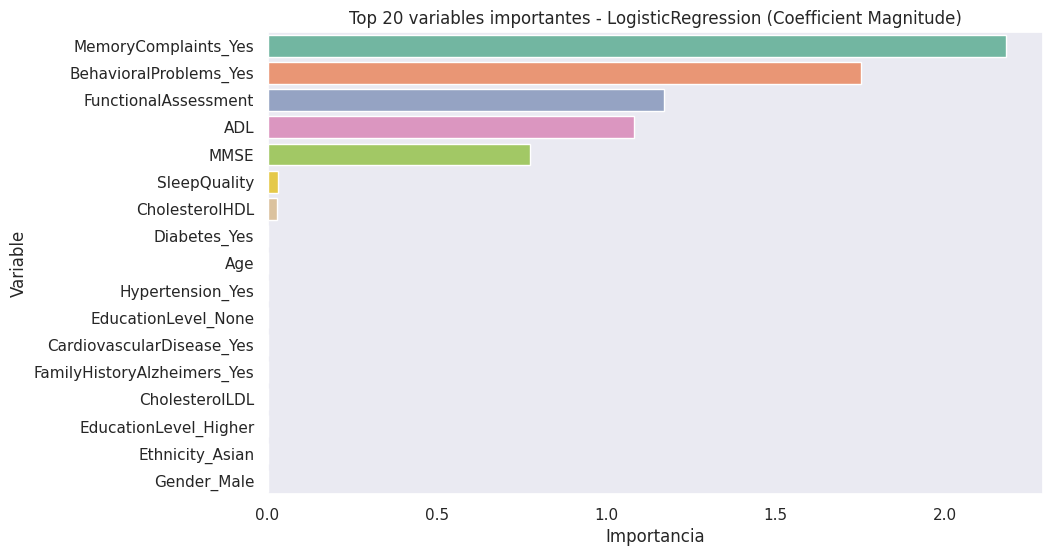

<ipython-input-119-5a4780e9f683>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')


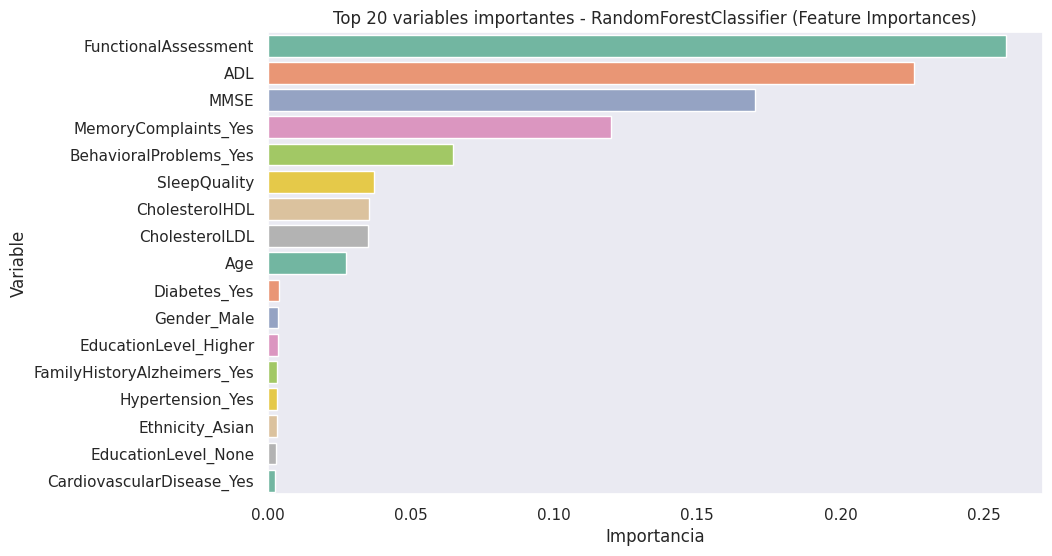

SVC no tiene importancia de características.


In [119]:
modelos = [
    ("LogisticRegression", best_rl),
    ("RandomForestClassifier", best_rf),
    ("SVC", best_svm)
]


for nombre, modelo in modelos:
  if hasattr(modelo, 'feature_importances_'):
    feature_importances = modelo.feature_importances_
    importance_type = 'Feature Importances'

  elif hasattr(modelo, 'coef_'):
    feature_importances = abs(modelo.coef_[0])
    importance_type = 'Coefficient Magnitude'

  else:
    print(f"{nombre} no tiene importancia de características.")
    continue

  feature_importances_df = pd.DataFrame({
      'Feature': X_train.columns,
      'Importance': feature_importances
  })

  feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')
  plt.title(f"Top 20 variables importantes - {nombre} ({importance_type})")
  plt.xlabel('Importancia')
  plt.ylabel('Variable')
  plt.grid(False)
  plt.show()

# Evaluacion

In [120]:
def metricas(modelo, X_test, y_test):
    # Predicciones del modelo
    y_pred = modelo.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()


    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)


    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)


    print(f'Métricas del modelo: {modelo}')
    print(f'Exactitud: {accuracy:.2f}')
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'Sensibilidad: {sensibilidad:.2f}')
    print(f'Especificidad: {especificidad:.2f}')
    print(f'AUC: {auc_score:.2f}')
    print()


    plt.plot(fpr, tpr, label=f'Modelo (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC {modelo}')
    plt.legend(loc='lower right')
    plt.show()


Métricas del modelo: LogisticRegression(C=0.1, penalty='l1', solver='saga')
Exactitud: 0.83
Precisión: 0.82
Recall: 0.70
F1-Score: 0.75
Sensibilidad: 0.70
Especificidad: 0.91
AUC: 0.89



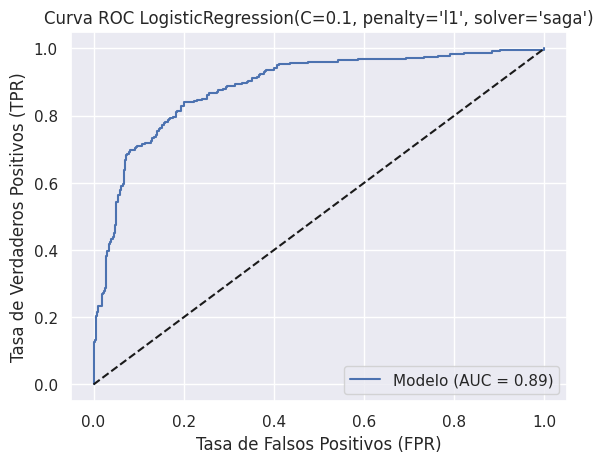

In [121]:
#Regresion logistica
metricas(best_rl, X_test, y_test)

Métricas del modelo: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)
Exactitud: 0.93
Precisión: 0.95
Recall: 0.85
F1-Score: 0.90
Sensibilidad: 0.85
Especificidad: 0.97
AUC: 0.94



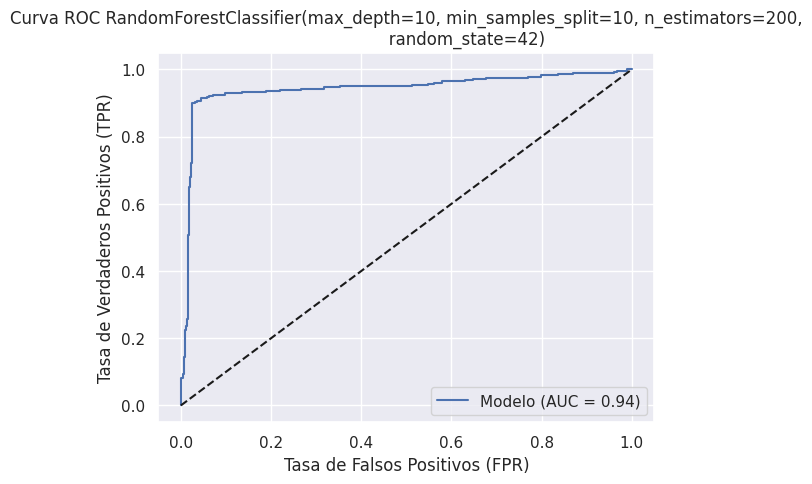

In [122]:
#Random forest
metricas(best_rf, X_test, y_test)

Métricas del modelo: SVC(C=10, gamma='auto', probability=True)
Exactitud: 0.84
Precisión: 0.82
Recall: 0.73
F1-Score: 0.77
Sensibilidad: 0.73
Especificidad: 0.90
AUC: 0.90



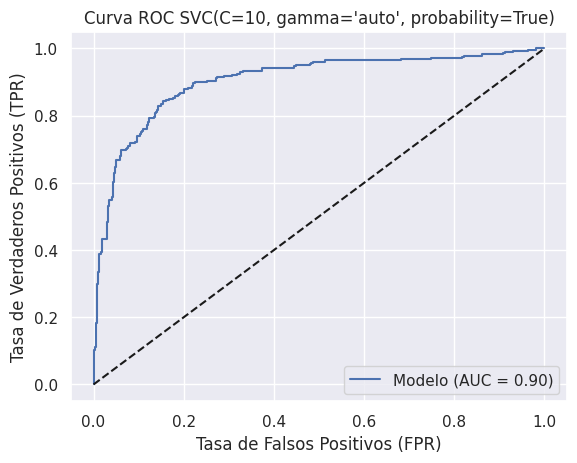

In [123]:
# SVM
metricas(best_svm, X_test, y_test)